<h1> Visualization of fiberphotometry data </h1> <p>Analyze separately Struggle and Immobility bouts. <br />Exemple file naming : 142D4Excitatory_psth.csv </p>

<h2>Imports</h2>

<p>Import the required libraries.</p>


In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from tkinter import filedialog
import tkinter as tk
from scipy import stats
%matplotlib inline

<h2> Create utility Functions </h2> <p>First load everything for the Struggle periods.</p>


In [2]:
# Cell 2: Utility Functions
def get_data_directory():
    """Open a GUI directory selector"""
    root = tk.Tk()
    root.withdraw()
    directory = filedialog.askdirectory(title='Select Directory Containing PSTH Files')
    return Path(directory)

def load_psth(file_path):
    """Load a PSTH file and return time points and trial data"""
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_lines = lines[1:]  # Skip header row
    
    time_points = []
    trials = []
    
    for line in data_lines:
        values = line.strip().split(',')
        # First value is time
        time_points.append(float(values[0]))  # NOT values[1], use values[0] for time!
        # Rest are trials
        trial_row = [float(v) for v in values[1:] if v.strip()]
        trials.append(trial_row)
    
    return np.array(time_points), np.array(trials)

<h2> Plotting Functions <h2>

In [3]:
# Cell 3: Plotting Functions
def plot_individual_mouse(mouse_id, data, condition='Inh'):
    """Create plots for a single mouse showing D4 vs D6"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    for day, color in zip(['D4', 'D6'], ['blue', 'red']):
        if day in data:
            time = data[day]['time']
            trials = data[day]['trials']
            mean = np.mean(trials, axis=1)
            sem = np.std(trials, axis=1) / np.sqrt(trials.shape[1])
            
            # Plot individual trials and mean
            for i in range(trials.shape[1]):
                ax1.plot(time, trials[:, i], color=color, alpha=0.2, linewidth=0.5)
                ax2.plot(time, trials[:, i], color=color, alpha=0.2, linewidth=0.5)
            
            # Plot mean ± SEM
            ax1.plot(time, mean, color=color, linewidth=2, 
                    label=f'{day} (n={trials.shape[1]} trials)')
            ax1.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
            
            ax2.plot(time, mean, color=color, linewidth=2, 
                    label=f'{day} (n={trials.shape[1]} trials)')
            ax2.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
    
    # Set up zoomed plot
    ax1.set_xlim(-0.75, 1.0)
    ax1.set_title(f'Mouse {mouse_id} {condition} - Zoomed View')
    ax1.set_xlabel('Time from struggle onset (s)')
    ax1.set_ylabel('ΔF/F (%)')
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Set up full plot
    ax2.set_xlim(-10, 10)
    ax2.set_title(f'Mouse {mouse_id} {condition} - Full View')
    ax2.set_xlabel('Time from struggle onset (s)')
    ax2.set_ylabel('ΔF/F (%)')
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

<h2> Load data for the Struggle</h2>

In [5]:
# Cell 4: Data Loading and Processing
# Get directory and condition from user
data_dir = get_data_directory()
condition = input("Enter condition (e.g., 'Inh' or 'Exc'): ")

# Find all relevant files
psth_files = list(data_dir.glob(f'*{condition}*psth.csv'))
print(f"\nFound files:")
for file in psth_files:
    print(f"- {file.name}")

# Process all files
individual_results = {}
for file in psth_files:
    mouse = file.name[:3]
    day = file.name[3:5]
    
    time, trials = load_psth(file)
    
    if mouse not in individual_results:
        individual_results[mouse] = {}
    
    individual_results[mouse][day] = {
        'time': time,
        'trials': trials
    }

Enter condition (e.g., 'Inh' or 'Exc'):  Exc



Found files:
- 092D4exc_psth.csv
- 092D6exc_psth.csv
- 097D4exc_psth.csv
- 097D6exc_psth.csv
- 098D4exc_psth.csv
- 098D6exc_psth.csv
- 136D4exc_psth.csv
- 136D6exc_psth.csv
- 138D4exc_psth.csv
- 138D6exc_psth.csv
- 146D4exc_psth.csv
- 146D6exc_psth.csv


<h2>Individual Struggle mice plots</h2>


Processing Mouse 092:


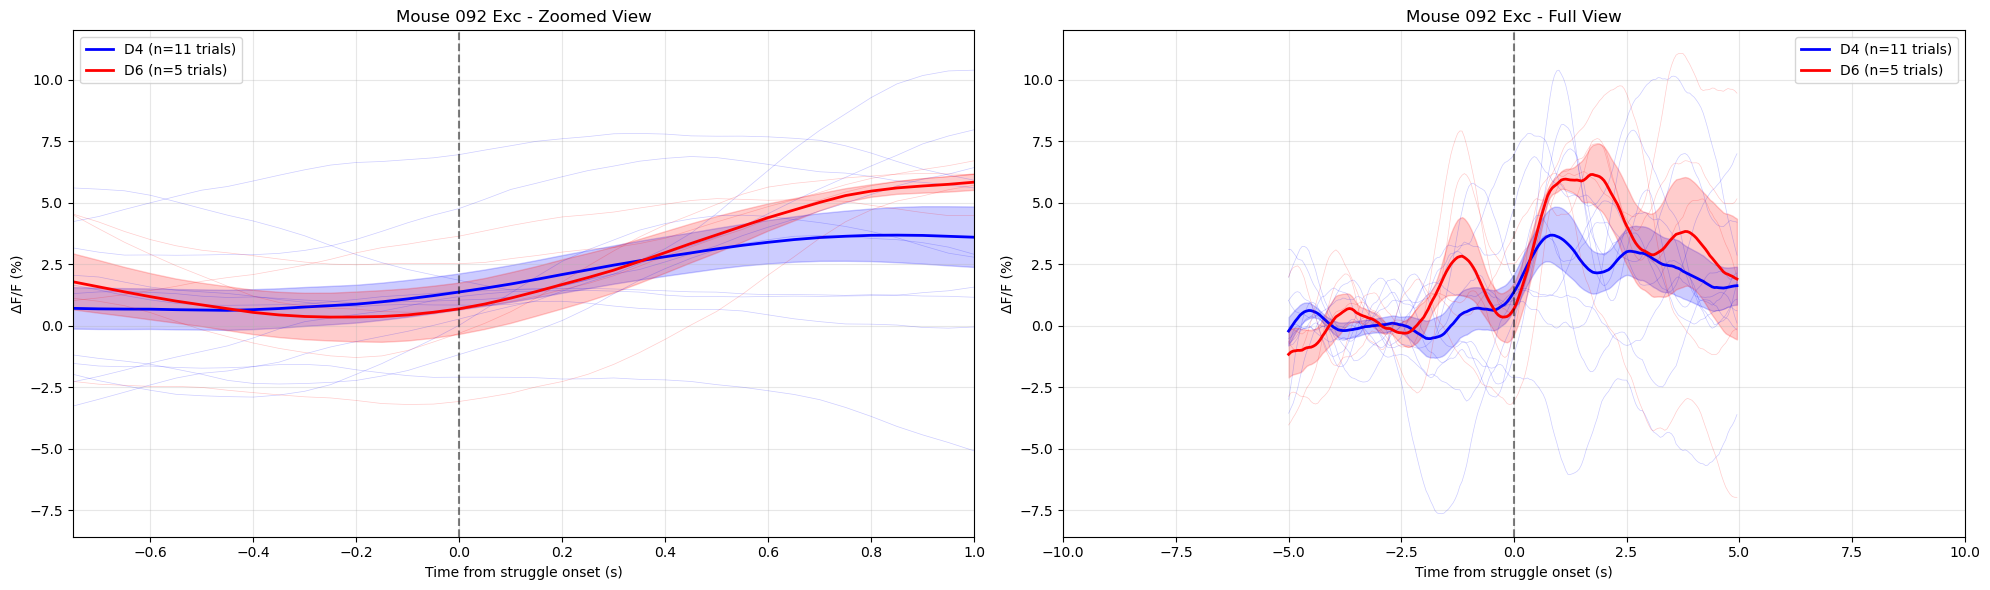


Processing Mouse 097:


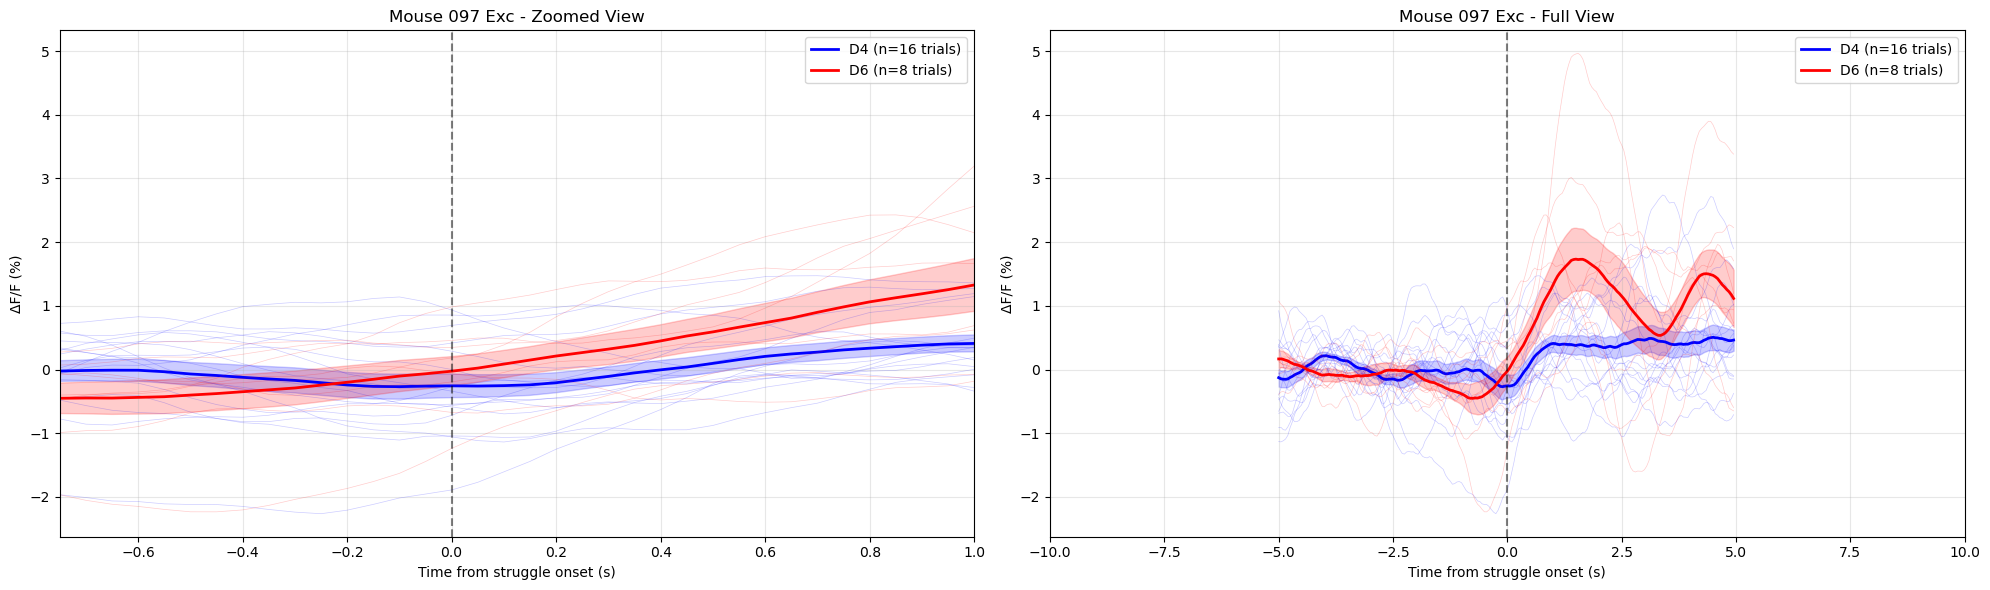


Processing Mouse 098:


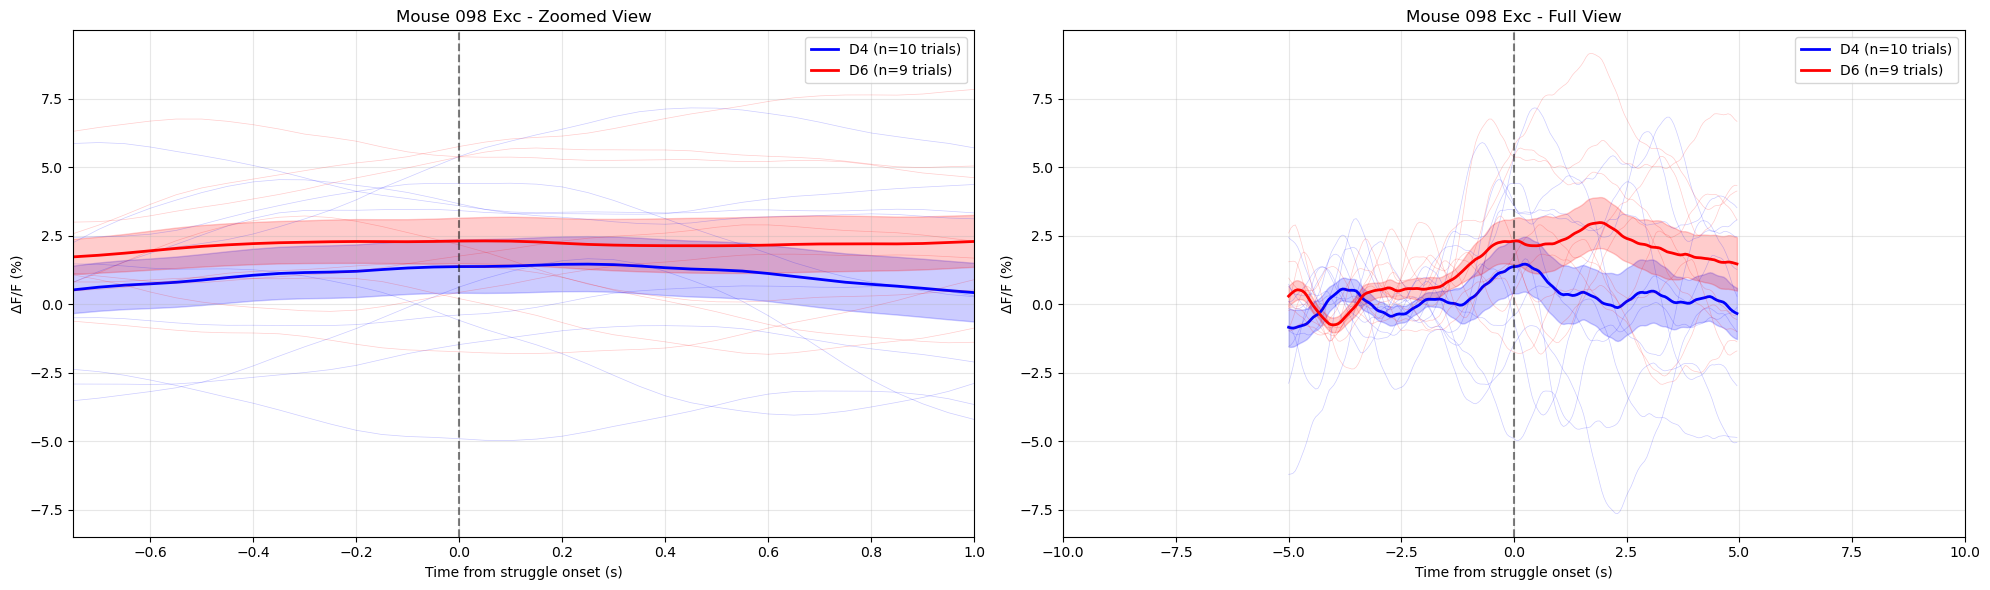


Processing Mouse 136:


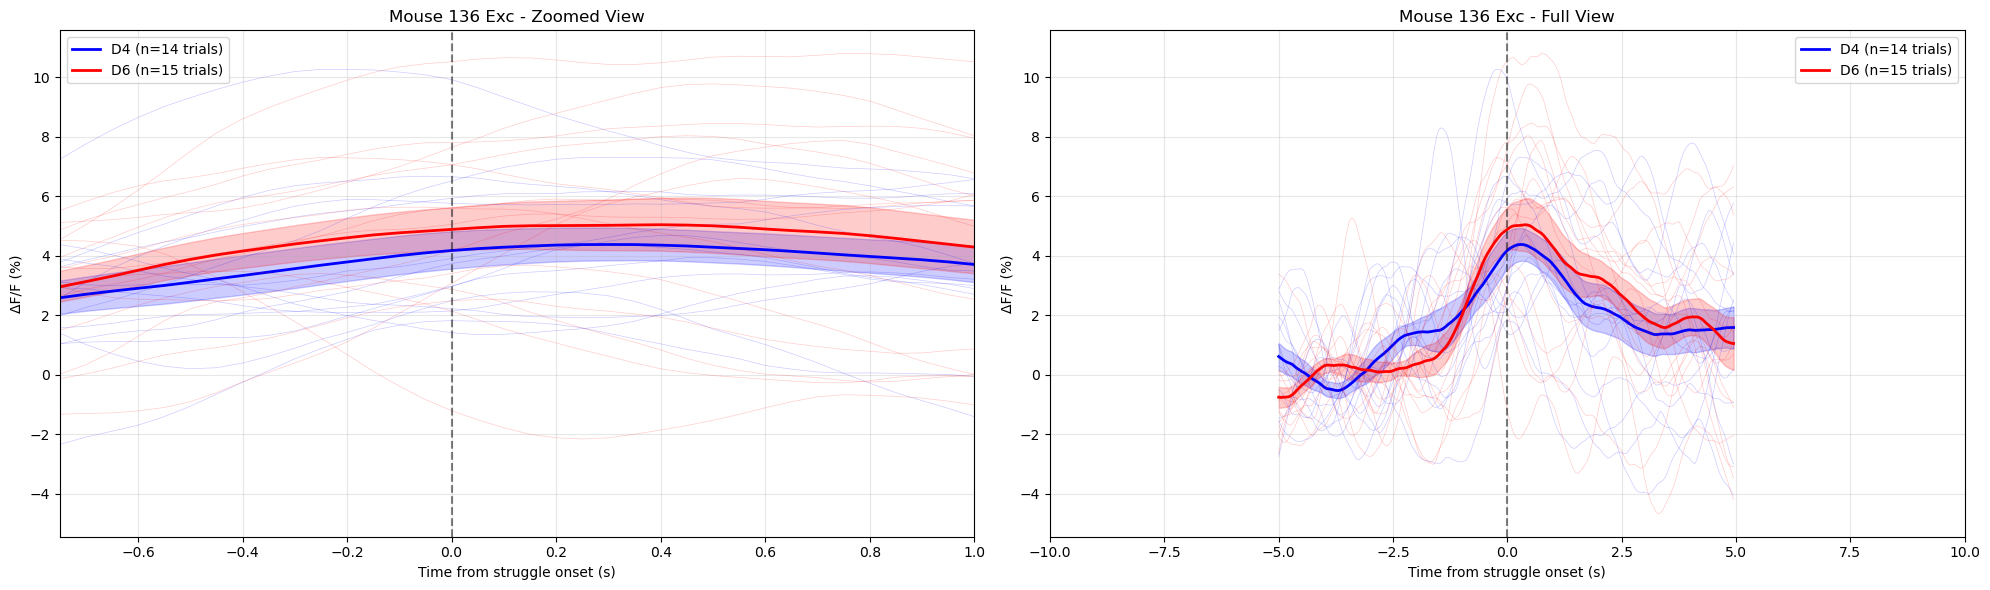


Processing Mouse 138:


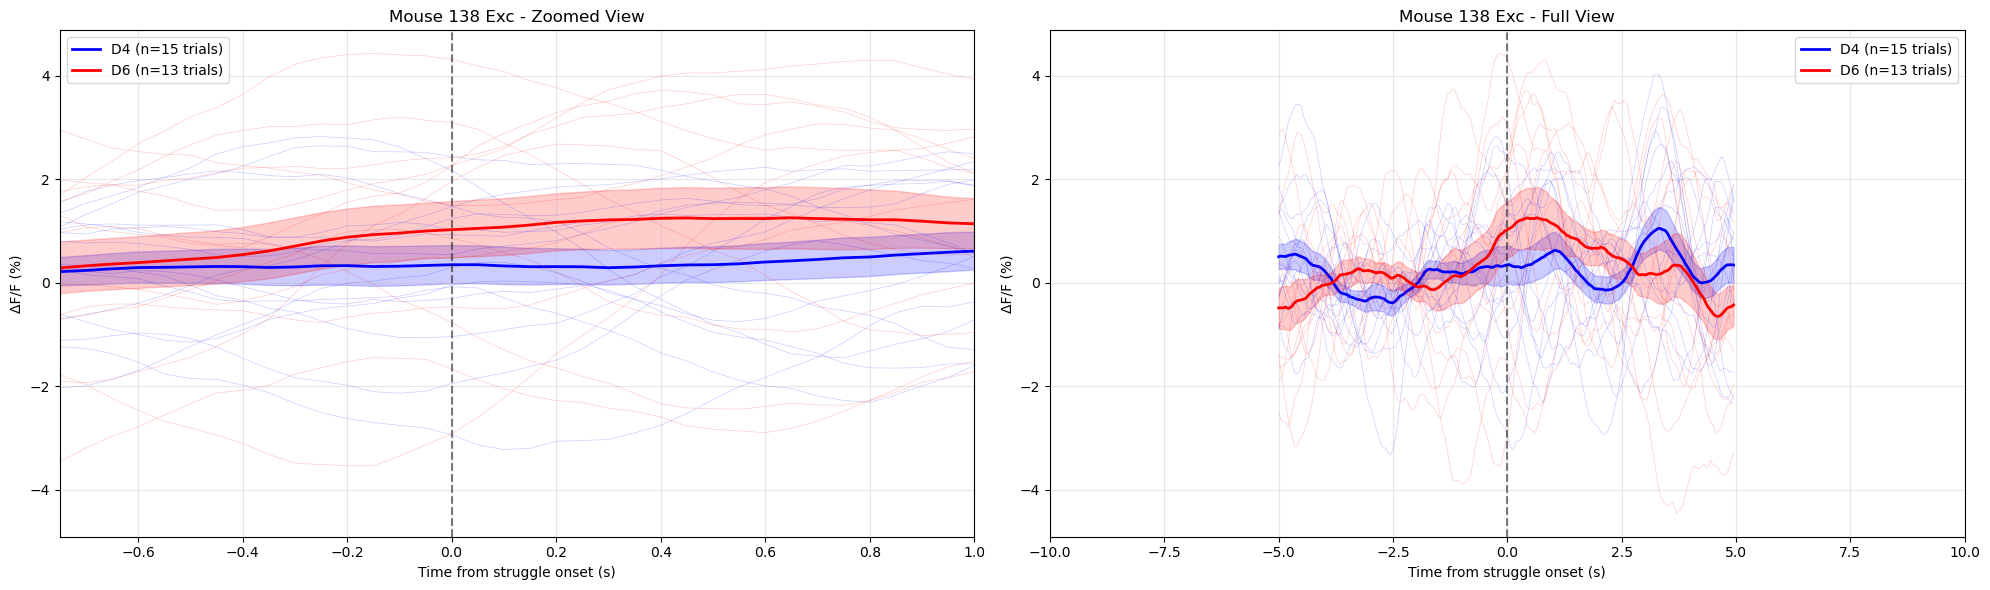


Processing Mouse 146:


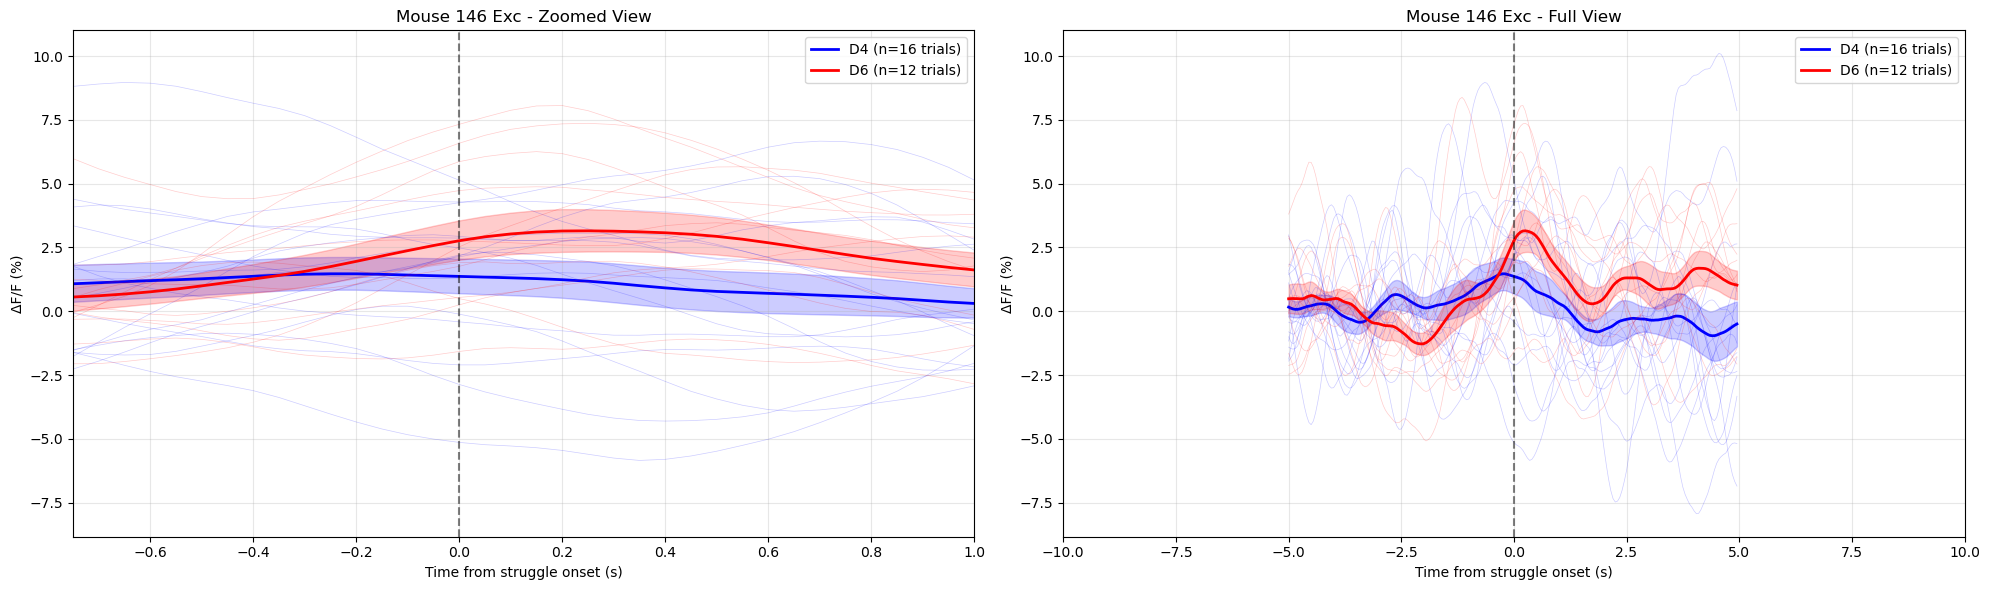

In [6]:
# Cell 5: Individual Mouse Plots
for mouse in individual_results:
    print(f"\nProcessing Mouse {mouse}:")
    plot_individual_mouse(mouse, individual_results[mouse], condition)

<h2>Group comparison plot</h2>

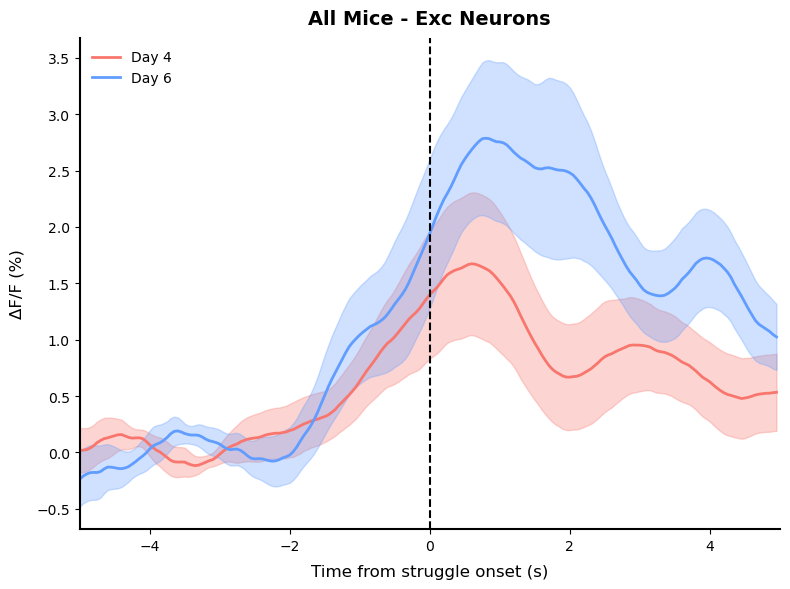

In [7]:
# Cell 6: Group Comparison Plot
plt.figure(figsize=(8, 6))  # Reduced width for a more compact look

d4_means = []
d6_means = []
common_timepoints = None

for mouse, data in individual_results.items():
    if 'D4' in data and 'D6' in data:
        d4_means.append(np.mean(data['D4']['trials'], axis=1))
        d6_means.append(np.mean(data['D6']['trials'], axis=1))
        common_timepoints = data['D4']['time']

if d4_means and d6_means:
    d4_means = np.array(d4_means)
    d6_means = np.array(d6_means)
    
    # Calculate grand means
    d4_grand_mean = np.mean(d4_means, axis=0)
    d4_grand_sem = np.std(d4_means, axis=0) / np.sqrt(len(d4_means))
    d6_grand_mean = np.mean(d6_means, axis=0)
    d6_grand_sem = np.std(d6_means, axis=0) / np.sqrt(len(d6_means))
    
    # Plot Day 4
    plt.plot(common_timepoints, d4_grand_mean, color='#F8766D', label='Day 4', linewidth=2)
    plt.fill_between(common_timepoints, 
                     d4_grand_mean - d4_grand_sem,
                     d4_grand_mean + d4_grand_sem,
                     color='#F8766D', alpha=0.3)
    
    # Plot Day 6
    plt.plot(common_timepoints, d6_grand_mean, color='#619CFF', label='Day 6', linewidth=2)
    plt.fill_between(common_timepoints,
                     d6_grand_mean - d6_grand_sem,
                     d6_grand_mean + d6_grand_sem,
                     color='#619CFF', alpha=0.3)

# Update x-axis range
plt.xlim(-5, 5)

# Aesthetic improvements: clean layout
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['left'].set_linewidth(1.5)  # Thicken remaining spines
plt.gca().spines['bottom'].set_linewidth(1.5)

# Improved labels and title
plt.title(f'All Mice - {condition} Neurons', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Time from struggle onset (s)', fontsize=12, labelpad=8)
plt.ylabel('ΔF/F (%)', fontsize=12, labelpad=8)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)

# Tick adjustments
plt.tick_params(axis='both', which='major', labelsize=10)

# Remove gridlines
plt.grid(False)

# Legend adjustments
plt.legend(fontsize=10, frameon=False, loc='upper left')

# Save as an SVG file
# Define the save path within the data directory
output_path = data_dir / 'Excitatory_PSTH.svg'
plt.savefig(output_path, format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()

<h2> Statistics</h2>

Analysis includes 6 mice: 092, 097, 098, 136, 138, 146

1. Peak Response Analysis (-1 to 2s window):
Day 4: 2.007 ± 1.500
Day 6: 3.388 ± 1.728
Paired t-test: t=-4.908, p=0.004
Wilcoxon signed-rank test: W=0.000, p=0.031
Cohen's d effect size: 0.853

2. Mean Response Analysis (0 to 2s window):
Day 4: 1.201 ± 1.162
Day 6: 2.150 ± 1.289
Paired t-test: t=-5.086, p=0.004
Wilcoxon signed-rank test: W=0.000, p=0.031
Cohen's d effect size: 0.773

3. Area Under Curve Analysis (0 to 2s):
Day 4: 3.631 ± 3.502
Day 6: 6.469 ± 3.870
Paired t-test: t=-5.171, p=0.004
Wilcoxon signed-rank test: W=0.000, p=0.031
Cohen's d effect size: 0.769



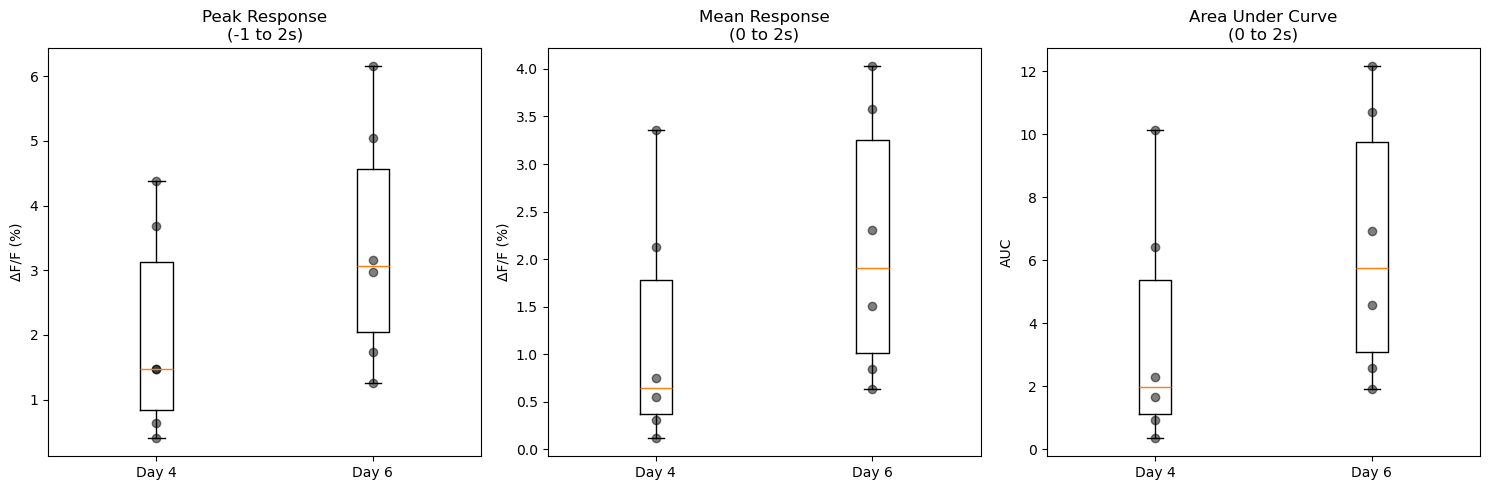

In [8]:
# Cell: Statistics
from scipy import stats

def analyze_statistics(individual_results):
    """
    Comprehensive statistical analysis comparing D4 vs D6
    """
    # Prepare data arrays
    d4_peaks = []
    d6_peaks = []
    d4_mean_response = []
    d6_mean_response = []
    d4_auc = []
    d6_auc = []
    mouse_ids = []
    
    # Analysis windows
    for mouse, data in individual_results.items():
        if 'D4' in data and 'D6' in data:
            # Calculate mean for each day from trials
            d4_mean = np.mean(data['D4']['trials'], axis=1)
            d6_mean = np.mean(data['D6']['trials'], axis=1)
            time = data['D4']['time']
            
            # Define time windows
            peak_window = (time >= -1) & (time <= 2)  # -1 to 2s for peak
            response_window = (time >= -1) & (time <= 2)  # 0 to 2s for mean/AUC
            
            # Calculate metrics
            d4_peaks.append(np.max(d4_mean[peak_window]))
            d6_peaks.append(np.max(d6_mean[peak_window]))
            
            d4_mean_response.append(np.mean(d4_mean[response_window]))
            d6_mean_response.append(np.mean(d6_mean[response_window]))
            
            d4_auc.append(np.trapz(d4_mean[response_window], time[response_window]))
            d6_auc.append(np.trapz(d6_mean[response_window], time[response_window]))
            
            mouse_ids.append(mouse)
            
    # Print basic information
    print(f"Analysis includes {len(mouse_ids)} mice: {', '.join(mouse_ids)}\n")

    # 1. Peak Response Analysis
    print("1. Peak Response Analysis (-1 to 2s window):")
    print(f"Day 4: {np.mean(d4_peaks):.3f} ± {np.std(d4_peaks):.3f}")
    print(f"Day 6: {np.mean(d6_peaks):.3f} ± {np.std(d6_peaks):.3f}")
    
    # Statistical tests
    t_stat, p_val = stats.ttest_rel(d4_peaks, d6_peaks)
    print(f"Paired t-test: t={t_stat:.3f}, p={p_val:.3f}")
    
    w_stat, w_p = stats.wilcoxon(d4_peaks, d6_peaks)
    print(f"Wilcoxon signed-rank test: W={w_stat:.3f}, p={w_p:.3f}")
    
    # Effect size
    d = (np.mean(d6_peaks) - np.mean(d4_peaks)) / np.sqrt((np.std(d4_peaks)**2 + np.std(d6_peaks)**2) / 2)
    print(f"Cohen's d effect size: {d:.3f}\n")

    # 2. Mean Response Analysis
    print("2. Mean Response Analysis (0 to 2s window):")
    print(f"Day 4: {np.mean(d4_mean_response):.3f} ± {np.std(d4_mean_response):.3f}")
    print(f"Day 6: {np.mean(d6_mean_response):.3f} ± {np.std(d6_mean_response):.3f}")
    
    t_stat, p_val = stats.ttest_rel(d4_mean_response, d6_mean_response)
    print(f"Paired t-test: t={t_stat:.3f}, p={p_val:.3f}")
    
    w_stat, w_p = stats.wilcoxon(d4_mean_response, d6_mean_response)
    print(f"Wilcoxon signed-rank test: W={w_stat:.3f}, p={w_p:.3f}")
    
    d = (np.mean(d6_mean_response) - np.mean(d4_mean_response)) / np.sqrt((np.std(d4_mean_response)**2 + np.std(d6_mean_response)**2) / 2)
    print(f"Cohen's d effect size: {d:.3f}\n")

    # 3. AUC Analysis
    print("3. Area Under Curve Analysis (0 to 2s):")
    print(f"Day 4: {np.mean(d4_auc):.3f} ± {np.std(d4_auc):.3f}")
    print(f"Day 6: {np.mean(d6_auc):.3f} ± {np.std(d6_auc):.3f}")
    
    t_stat, p_val = stats.ttest_rel(d4_auc, d6_auc)
    print(f"Paired t-test: t={t_stat:.3f}, p={p_val:.3f}")
    
    w_stat, w_p = stats.wilcoxon(d4_auc, d6_auc)
    print(f"Wilcoxon signed-rank test: W={w_stat:.3f}, p={w_p:.3f}")
    
    d = (np.mean(d6_auc) - np.mean(d4_auc)) / np.sqrt((np.std(d4_auc)**2 + np.std(d6_auc)**2) / 2)
    print(f"Cohen's d effect size: {d:.3f}\n")

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Peak Response
    axes[0].boxplot([d4_peaks, d6_peaks], labels=['Day 4', 'Day 6'])
    axes[0].set_title('Peak Response\n(-1 to 2s)')
    axes[0].set_ylabel('ΔF/F (%)')
    # Add individual points
    for i, data in enumerate([d4_peaks, d6_peaks], 1):
        axes[0].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    # 2. Mean Response
    axes[1].boxplot([d4_mean_response, d6_mean_response], labels=['Day 4', 'Day 6'])
    axes[1].set_title('Mean Response\n(0 to 2s)')
    axes[1].set_ylabel('ΔF/F (%)')
    for i, data in enumerate([d4_mean_response, d6_mean_response], 1):
        axes[1].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    # 3. AUC
    axes[2].boxplot([d4_auc, d6_auc], labels=['Day 4', 'Day 6'])
    axes[2].set_title('Area Under Curve\n(0 to 2s)')
    axes[2].set_ylabel('AUC')
    for i, data in enumerate([d4_auc, d6_auc], 1):
        axes[2].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_statistics(individual_results)

<h2>Saving results</h2>

In [9]:
# Cell: Save Results
import os
import json
import pandas as pd

def save_all_results(individual_results, parent_dir):
    """
    Save all results in appropriate subfolders within the chosen directory
    """
    # Create necessary directories as subfolders of parent_dir
    for directory in ['Figures', 'Results', 'Data']:
        subfolder_path = os.path.join(parent_dir, directory)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
    
    # 1. Save figures (already being done in plotting functions, but let's make it explicit)
    def save_figure(fig, filename):
        fig.savefig(os.path.join(parent_dir, 'Figures', f'{filename}.svg'), format='svg', bbox_inches='tight', dpi=300)
        fig.savefig(os.path.join(parent_dir, 'Figures', f'{filename}.pdf'), format='pdf', bbox_inches='tight', dpi=300)

    # 2. Calculate statistics and prepare data for saving
    stats_data = {
        'mouse_id': [],
        'day4_peak': [],
        'day6_peak': [],
        'day4_mean': [],
        'day6_mean': [],
        'day4_auc': [],
        'day6_auc': []
    }
    
    detailed_stats = []
    
    for mouse, data in individual_results.items():
        if 'D4' in data and 'D6' in data:
            # Calculate mean for each day
            d4_mean = np.mean(data['D4']['trials'], axis=1)
            d6_mean = np.mean(data['D6']['trials'], axis=1)
            time = data['D4']['time']
            
            # Define windows
            peak_window = (time >= -1) & (time <= 2)
            response_window = (time >= -1) & (time <= 2)
            
            # Calculate metrics
            stats_data['mouse_id'].append(mouse)
            stats_data['day4_peak'].append(np.max(d4_mean[peak_window]))
            stats_data['day6_peak'].append(np.max(d6_mean[peak_window]))
            stats_data['day4_mean'].append(np.mean(d4_mean[response_window]))
            stats_data['day6_mean'].append(np.mean(d6_mean[response_window]))
            stats_data['day4_auc'].append(np.trapz(d4_mean[response_window], time[response_window]))
            stats_data['day6_auc'].append(np.trapz(d6_mean[response_window], time[response_window]))
    
    # Convert to DataFrame for easy saving
    df_stats = pd.DataFrame(stats_data)
    
    # Calculate statistical tests
    for metric in ['peak', 'mean', 'auc']:
        d4_vals = df_stats[f'day4_{metric}']
        d6_vals = df_stats[f'day6_{metric}']
        
        # T-test
        t_stat, p_val = stats.ttest_rel(d4_vals, d6_vals)
        # Wilcoxon
        w_stat, w_p = stats.wilcoxon(d4_vals, d6_vals)
        # Effect size
        d = (np.mean(d6_vals) - np.mean(d4_vals)) / np.sqrt((np.std(d4_vals)**2 + np.std(d6_vals)**2) / 2)
        
        detailed_stats.append({
            'metric': metric,
            'day4_mean': np.mean(d4_vals),
            'day4_sd': np.std(d4_vals),
            'day6_mean': np.mean(d6_vals),
            'day6_sd': np.std(d6_vals),
            't_stat': t_stat,
            'p_value': p_val,
            'wilcoxon_stat': w_stat,
            'wilcoxon_p': w_p,
            'cohens_d': d
        })
    
    # Save results
    # 1. Excel file for GraphPad
    df_stats.to_excel(os.path.join(parent_dir, 'Data', 'individual_mouse_metrics.xlsx'), index=False)
   
    # 2. CSV files for each metric (also for GraphPad)
    for metric in ['peak', 'mean', 'auc']:
        df_metric = pd.DataFrame({
            'Mouse_ID': df_stats['mouse_id'],
            'Day_4': df_stats[f'day4_{metric}'],
            'Day_6': df_stats[f'day6_{metric}']
        })
        df_metric.to_csv(os.path.join(parent_dir, 'Data', f'{metric}_response.csv'), index=False)
    
    # 3. Detailed statistics text file
    with open(os.path.join(parent_dir, 'Results', 'detailed_statistics.txt'), 'w') as f:
        f.write("PSTH Analysis Statistics\n")
        f.write("=======================\n\n")
        f.write(f"Analysis includes {len(stats_data['mouse_id'])} mice: {', '.join(stats_data['mouse_id'])}\n\n")
        
        for stat in detailed_stats:
            f.write(f"\n{stat['metric'].upper()} RESPONSE ANALYSIS:\n")
            f.write("-----------------------\n")
            f.write(f"Day 4: {stat['day4_mean']:.3f} ± {stat['day4_sd']:.3f}\n")
            f.write(f"Day 6: {stat['day6_mean']:.3f} ± {stat['day6_sd']:.3f}\n")
            f.write(f"Paired t-test: t={stat['t_stat']:.3f}, p={stat['p_value']:.3f}\n")
            f.write(f"Wilcoxon test: W={stat['wilcoxon_stat']:.3f}, p={stat['wilcoxon_p']:.3f}\n")
            f.write(f"Cohen's d: {stat['cohens_d']:.3f}\n")
    
    print(f"All results saved in {parent_dir}:")
    print(f"1. Figures saved in SVG and PDF format in {os.path.join(parent_dir, 'Figures')}")
    print(f"2. Statistical results saved in {os.path.join(parent_dir, 'Results')}")
    print(f"3. Individual data saved in {os.path.join(parent_dir, 'Data')} (ready for GraphPad)")

# Run the saving function
save_all_results(individual_results, str(data_dir))

All results saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle:
1. Figures saved in SVG and PDF format in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle\Figures
2. Statistical results saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle\Results
3. Individual data saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle\Data (ready for GraphPad)


In [10]:
# Cell: Save Results
import os
import json
import pandas as pd

def save_all_results(individual_results, parent_dir):
    """Save all results in appropriate subfolders"""
    # Create directories
    for directory in ['Figures', 'Results', 'Data']:
        subfolder_path = os.path.join(parent_dir, directory)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
    
    # Save individual mouse plots
    for mouse in individual_results:
        data = individual_results[mouse]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
        
        for day, color in zip(['D4', 'D6'], ['blue', 'red']):
            if day in data:
                time = data[day]['time']
                trials = data[day]['trials']
                mean = np.mean(trials, axis=1)
                sem = np.std(trials, axis=1) / np.sqrt(trials.shape[1])
                
                # Plot zoomed view
                for i in range(trials.shape[1]):
                    ax1.plot(time, trials[:, i], color=color, alpha=0.2, linewidth=0.5)
                ax1.plot(time, mean, color=color, linewidth=2, 
                        label=f'{day} (n={trials.shape[1]} trials)')
                ax1.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
                
                # Plot full view
                for i in range(trials.shape[1]):
                    ax2.plot(time, trials[:, i], color=color, alpha=0.2, linewidth=0.5)
                ax2.plot(time, mean, color=color, linewidth=2, 
                        label=f'{day} (n={trials.shape[1]} trials)')
                ax2.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
        
        # Setup zoomed plot
        ax1.set_xlim(-0.75, 1.0)
        ax1.set_title(f'Mouse {mouse} {condition} - Zoomed View')
        ax1.set_xlabel('Time from struggle onset (s)')
        ax1.set_ylabel('ΔF/F (%)')
        ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Setup full plot
        ax2.set_xlim(-10, 10)
        ax2.set_title(f'Mouse {mouse} {condition} - Full View')
        ax2.set_xlabel('Time from struggle onset (s)')
        ax2.set_ylabel('ΔF/F (%)')
        ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig(os.path.join(parent_dir, 'Figures', f'mouse_{mouse}_struggle.svg'), format='svg', bbox_inches='tight', dpi=300)
        plt.savefig(os.path.join(parent_dir, 'Figures', f'mouse_{mouse}_struggle.pdf'), format='pdf', bbox_inches='tight', dpi=300)
        plt.close()
    
    # Save group plot
    plt.figure(figsize=(12, 6))
    d4_means = []
    d6_means = []
    
    for mouse, data in individual_results.items():
        if 'D4' in data and 'D6' in data:
            d4_means.append(np.mean(data['D4']['trials'], axis=1))
            d6_means.append(np.mean(data['D6']['trials'], axis=1))
            common_timepoints = data['D4']['time']
    
    if d4_means and d6_means:
        d4_means = np.array(d4_means)
        d6_means = np.array(d6_means)
        
        d4_grand_mean = np.mean(d4_means, axis=0)
        d4_grand_sem = np.std(d4_means, axis=0) / np.sqrt(len(d4_means))
        d6_grand_mean = np.mean(d6_means, axis=0)
        d6_grand_sem = np.std(d6_means, axis=0) / np.sqrt(len(d6_means))
        
        plt.plot(common_timepoints, d4_grand_mean, 'b-', label='Day 4', linewidth=2)
        plt.fill_between(common_timepoints, 
                        d4_grand_mean - d4_grand_sem,
                        d4_grand_mean + d4_grand_sem,
                        color='blue', alpha=0.2)
        
        plt.plot(common_timepoints, d6_grand_mean, 'r-', label='Day 6', linewidth=2)
        plt.fill_between(common_timepoints,
                        d6_grand_mean - d6_grand_sem,
                        d6_grand_mean + d6_grand_sem,
                        color='red', alpha=0.2)
    
        plt.xlim(-10, 10)
        plt.title(f'All Mice - {condition} Neurons')
        plt.xlabel('Time from struggle onset (s)')
        plt.ylabel('ΔF/F (%)')
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.savefig(os.path.join(parent_dir, 'Figures', 'group_struggle.svg'), format='svg', bbox_inches='tight', dpi=300)
        plt.savefig(os.path.join(parent_dir, 'Figures', 'group_struggle.pdf'), format='pdf', bbox_inches='tight', dpi=300)
        plt.close()
    
    # Calculate stats and prepare data
    stats_data = {
        'mouse_id': [],
        'day4_peak': [],
        'day6_peak': [],
        'day4_mean': [],
        'day6_mean': [],
        'day4_auc': [],
        'day6_auc': []
    }
    
    detailed_stats = []
    
    for mouse, data in individual_results.items():
        if 'D4' in data and 'D6' in data:
            time = data['D4']['time']
            peak_window = (time >= -1) & (time <= 2)
            response_window = (time >= -1) & (time <= 2)
            
            d4_mean = np.mean(data['D4']['trials'], axis=1)
            d6_mean = np.mean(data['D6']['trials'], axis=1)
            
            stats_data['mouse_id'].append(mouse)
            stats_data['day4_peak'].append(np.max(d4_mean[peak_window]))
            stats_data['day6_peak'].append(np.max(d6_mean[peak_window]))
            stats_data['day4_mean'].append(np.mean(d4_mean[response_window]))
            stats_data['day6_mean'].append(np.mean(d6_mean[response_window]))
            stats_data['day4_auc'].append(np.trapz(d4_mean[response_window], time[response_window]))
            stats_data['day6_auc'].append(np.trapz(d6_mean[response_window], time[response_window]))

    # Save statistics plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Peak Response
    axes[0].boxplot([stats_data['day4_peak'], stats_data['day6_peak']], labels=['Day 4', 'Day 6'])
    axes[0].set_title('Peak Response\n(-1 to 2s)')
    axes[0].set_ylabel('ΔF/F (%)')
    for i, data in enumerate([stats_data['day4_peak'], stats_data['day6_peak']], 1):
        axes[0].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    # 2. Mean Response
    axes[1].boxplot([stats_data['day4_mean'], stats_data['day6_mean']], labels=['Day 4', 'Day 6'])
    axes[1].set_title('Mean Response\n(0 to 2s)')
    axes[1].set_ylabel('ΔF/F (%)')
    for i, data in enumerate([stats_data['day4_mean'], stats_data['day6_mean']], 1):
        axes[1].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    # 3. AUC
    axes[2].boxplot([stats_data['day4_auc'], stats_data['day6_auc']], labels=['Day 4', 'Day 6'])
    axes[2].set_title('Area Under Curve\n(0 to 2s)')
    axes[2].set_ylabel('AUC')
    for i, data in enumerate([stats_data['day4_auc'], stats_data['day6_auc']], 1):
        axes[2].scatter([i] * len(data), data, color='black', alpha=0.5)
    
    plt.tight_layout()
    plt.savefig(os.path.join(parent_dir, 'Figures', 'statistics.svg'), format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(os.path.join(parent_dir, 'Figures', 'statistics.pdf'), format='pdf', bbox_inches='tight', dpi=300)
    plt.close()

    # Calculate statistical tests
    df_stats = pd.DataFrame(stats_data)
    for metric in ['peak', 'mean', 'auc']:
        d4_vals = df_stats[f'day4_{metric}']
        d6_vals = df_stats[f'day6_{metric}']
        
        t_stat, p_val = stats.ttest_rel(d4_vals, d6_vals)
        w_stat, w_p = stats.wilcoxon(d4_vals, d6_vals)
        d = (np.mean(d6_vals) - np.mean(d4_vals)) / np.sqrt((np.std(d4_vals)**2 + np.std(d6_vals)**2) / 2)
        
        detailed_stats.append({
            'metric': metric,
            'day4_mean': np.mean(d4_vals),
            'day4_sd': np.std(d4_vals),
            'day6_mean': np.mean(d6_vals),
            'day6_sd': np.std(d6_vals),
            't_stat': t_stat,
            'p_value': p_val,
            'wilcoxon_stat': w_stat,
            'wilcoxon_p': w_p,
            'cohens_d': d
        })
    
    # Save results
    df_stats.to_excel(os.path.join(parent_dir, 'Data', 'individual_mouse_metrics.xlsx'), index=False)
    
    for metric in ['peak', 'mean', 'auc']:
        df_metric = pd.DataFrame({
            'Mouse_ID': df_stats['mouse_id'],
            'Day_4': df_stats[f'day4_{metric}'],
            'Day_6': df_stats[f'day6_{metric}']
        })
        df_metric.to_csv(os.path.join(parent_dir, 'Data', f'{metric}_response.csv'), index=False)
    
    # Save detailed statistics
    with open(os.path.join(parent_dir, 'Results', 'detailed_statistics.txt'), 'w') as f:
        f.write("PSTH Analysis Statistics\n")
        f.write("=======================\n\n")
        f.write(f"Analysis includes {len(stats_data['mouse_id'])} mice: {', '.join(stats_data['mouse_id'])}\n\n")
        
        for stat in detailed_stats:
            f.write(f"\n{stat['metric'].upper()} RESPONSE ANALYSIS:\n")
            f.write("-----------------------\n")
            f.write(f"Day 4: {stat['day4_mean']:.3f} ± {stat['day4_sd']:.3f}\n")
            f.write(f"Day 6: {stat['day6_mean']:.3f} ± {stat['day6_sd']:.3f}\n")
            f.write(f"Paired t-test: t={stat['t_stat']:.3f}, p={stat['p_value']:.3f}\n")
            f.write(f"Wilcoxon test: W={stat['wilcoxon_stat']:.3f}, p={stat['wilcoxon_p']:.3f}\n")
            f.write(f"Cohen's d: {stat['cohens_d']:.3f}\n")

    print(f"\nResults saved in {parent_dir}:")
    print(f"1. Figures saved in {os.path.join(parent_dir, 'Figures')}")
    print(f"2. Data saved in {os.path.join(parent_dir, 'Data')}")

# Call the function
save_all_results(individual_results, str(data_dir))


Results saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle:
1. Figures saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle\Figures
2. Data saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Struggle\Data


<h2> Linea Mixed effect model </h2>

Linear Mixed Effects Analysis


Analysis for Peak Response:
--------------------------

Model Summary:
           Coef. Std.Err.      z  P>|z| [0.025 0.975]
Intercept  0.295    0.149  1.973  0.048  0.002  0.587
Day[T.D6]  0.397    0.146  2.713  0.007  0.110  0.684
Mouse Var  0.058    0.366                            

Key Findings:
Effect of Day 6 vs Day 4: 0.397
P-value: 0.007
Cohen's d: 1.330


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


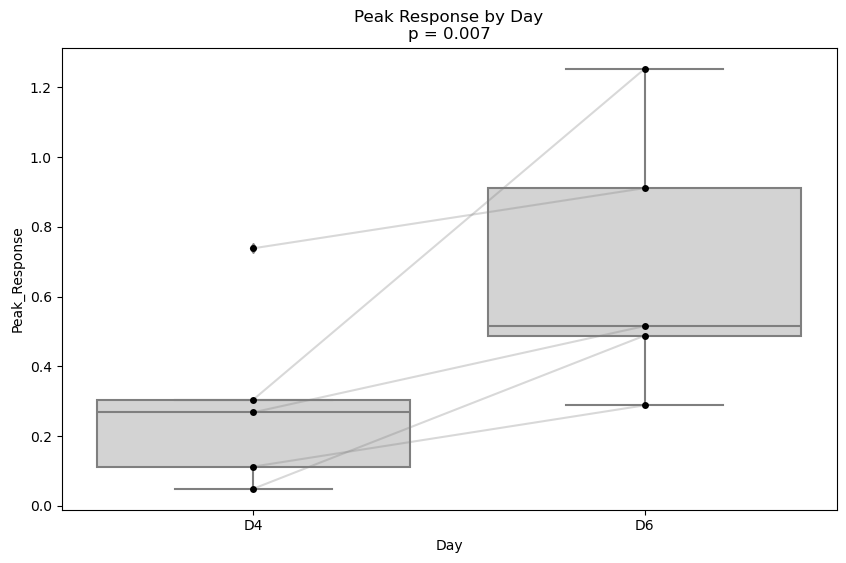


Analysis for Mean Response:
--------------------------


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Model Summary:
           Coef. Std.Err.      z  P>|z|  [0.025 0.975]
Intercept  0.188    0.116  1.629  0.103  -0.038  0.415
Day[T.D6]  0.335    0.071  4.727  0.000   0.196  0.474
Mouse Var  0.054    0.539                             

Key Findings:
Effect of Day 6 vs Day 4: 0.335
P-value: 0.000
Cohen's d: 1.451


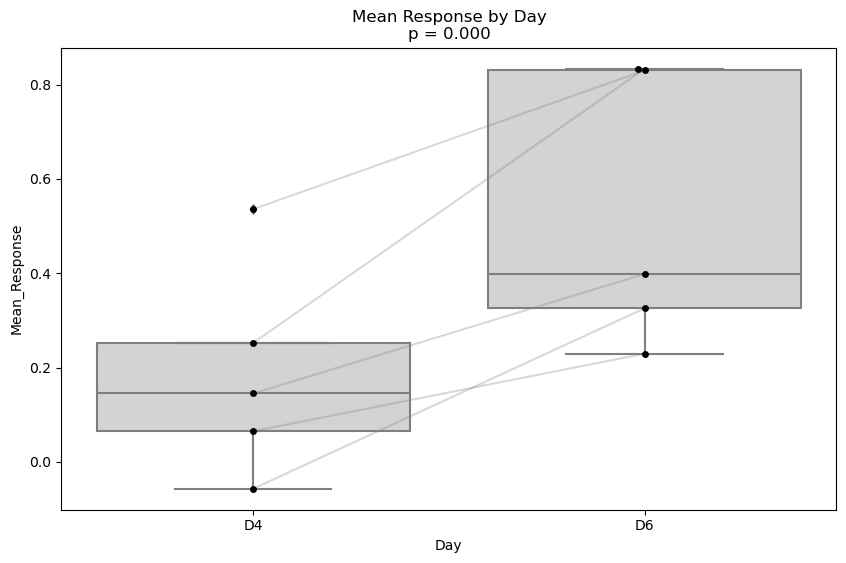


Analysis for AUC:
----------------

Model Summary:
           Coef. Std.Err.      z  P>|z|  [0.025 0.975]
Intercept  0.376    0.230  1.636  0.102  -0.074  0.827
Day[T.D6]  0.668    0.138  4.834  0.000   0.397  0.938
Mouse Var  0.217    1.102                             

Key Findings:
Effect of Day 6 vs Day 4: 0.668
P-value: 0.000
Cohen's d: 1.451


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


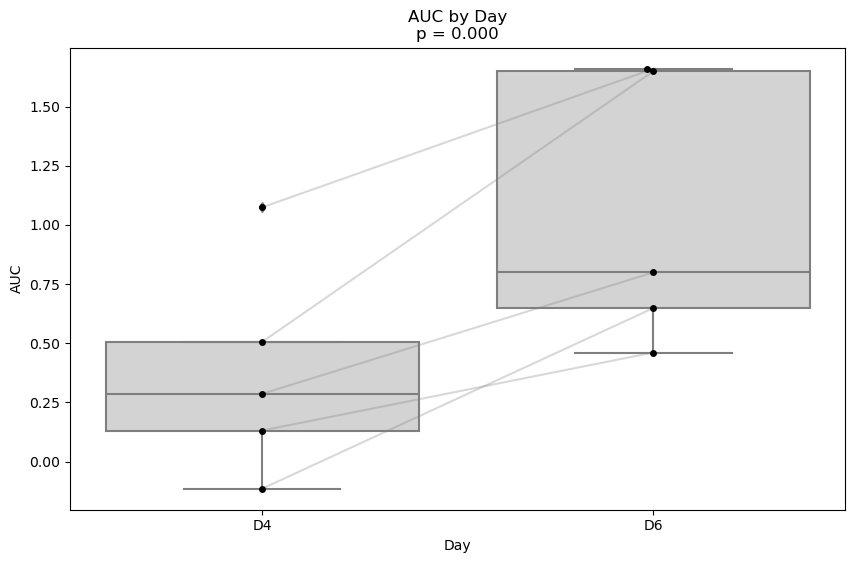

In [11]:
# Cell: Linear Mixed Effects Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

def run_lme_analysis(individual_results):
    """
    Run Linear Mixed Effects analysis on the data
    """
    # Prepare data in long format
    data_for_lme = {
        'Mouse': [],
        'Day': [],
        'Peak_Response': [],
        'Mean_Response': [],
        'AUC': []
    }
    
    for mouse, data in individual_results.items():
        if 'D4' in data and 'D6' in data:
            time = data['D4']['time']
            peak_window = (time >= -1) & (time <= 2)
            response_window = (time >= 0) & (time <= 2)
            
            # Calculate metrics for D4
            d4_mean = np.mean(data['D4']['trials'], axis=1)
            data_for_lme['Mouse'].append(mouse)
            data_for_lme['Day'].append('D4')
            data_for_lme['Peak_Response'].append(np.max(d4_mean[peak_window]))
            data_for_lme['Mean_Response'].append(np.mean(d4_mean[response_window]))
            data_for_lme['AUC'].append(np.trapz(d4_mean[response_window], time[response_window]))
            
            # Calculate metrics for D6
            d6_mean = np.mean(data['D6']['trials'], axis=1)
            data_for_lme['Mouse'].append(mouse)
            data_for_lme['Day'].append('D6')
            data_for_lme['Peak_Response'].append(np.max(d6_mean[peak_window]))
            data_for_lme['Mean_Response'].append(np.mean(d6_mean[response_window]))
            data_for_lme['AUC'].append(np.trapz(d6_mean[response_window], time[response_window]))
    
    # Convert to DataFrame
    df_lme = pd.DataFrame(data_for_lme)
    
    print("Linear Mixed Effects Analysis")
    print("============================\n")
    
    # Run LME for each metric
    for metric in ['Peak_Response', 'Mean_Response', 'AUC']:
        print(f"\nAnalysis for {metric.replace('_', ' ')}:")
        print("-" * (len(metric) + 13))
        
        # Fit the model
        model = smf.mixedlm(f"{metric} ~ Day", data=df_lme, groups="Mouse")
        results = model.fit()
        
        # Print results
        print("\nModel Summary:")
        print(results.summary().tables[1])  # Coefficient table
        
        # Extract and print key statistics
        coef = results.params['Day[T.D6]']  # Effect of D6 compared to D4
        pval = results.pvalues['Day[T.D6]']
        
        print("\nKey Findings:")
        print(f"Effect of Day 6 vs Day 4: {coef:.3f}")
        print(f"P-value: {pval:.3f}")
        
        # Calculate effect size (Cohen's d)
        d4_vals = df_lme[df_lme['Day'] == 'D4'][metric]
        d6_vals = df_lme[df_lme['Day'] == 'D6'][metric]
        cohens_d = (np.mean(d6_vals) - np.mean(d4_vals)) / np.sqrt((np.std(d4_vals)**2 + np.std(d6_vals)**2) / 2)
        print(f"Cohen's d: {cohens_d:.3f}")
        
        # Visualization
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_lme, x='Day', y=metric, color='lightgray')
        sns.swarmplot(data=df_lme, x='Day', y=metric, color='black')
        
        # Add lines connecting same mouse
        for mouse in df_lme['Mouse'].unique():
            mouse_data = df_lme[df_lme['Mouse'] == mouse]
            plt.plot([0, 1], 
                    [mouse_data[mouse_data['Day'] == 'D4'][metric].values[0],
                     mouse_data[mouse_data['Day'] == 'D6'][metric].values[0]],
                     'gray', alpha=0.3)
            
        plt.title(f'{metric.replace("_", " ")} by Day\np = {pval:.3f}')
        plt.show()
    
    # Save detailed results
    with open(os.path.join(data_dir, 'Results', 'lme_analysis.txt'), 'w') as f:
        for metric in ['Peak_Response', 'Mean_Response', 'AUC']:
            model = smf.mixedlm(f"{metric} ~ Day", data=df_lme, groups="Mouse")
            results = model.fit()
            
            f.write(f"\nAnalysis for {metric.replace('_', ' ')}:\n")
            f.write("-" * (len(metric) + 13) + "\n")
            f.write(str(results.summary()) + "\n")
            f.write("\n" + "="*50 + "\n")
    
    # Save data used for LME
    df_lme.to_csv(os.path.join(data_dir, 'Data', 'lme_analysis_data.csv'), index=False)

# Run the analysis
run_lme_analysis(individual_results)

<h1> Inclusion of immobility data </h1> <p>Here, load the folder of the immobile data. Named similarly.</p>

In [15]:
# Cell: Load Immobility Data
print("Select directory containing immobility PSTH files...")
immobile_dir = get_data_directory()
print("Selected directory for immobility data:", immobile_dir)

immobile_results = {}
psth_files = list(immobile_dir.glob('*psth.csv'))
for file in psth_files:
    mouse = file.name[:3]
    day = file.name[3:5]
    
    time, trials = load_psth(file)
    
    if mouse not in immobile_results:
        immobile_results[mouse] = {}
    
    immobile_results[mouse][day] = {
        'time': time,
        'trials': trials
    }

Select directory containing immobility PSTH files...
Selected directory for immobility data: C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Immobility


<h2> Visualization</h2>

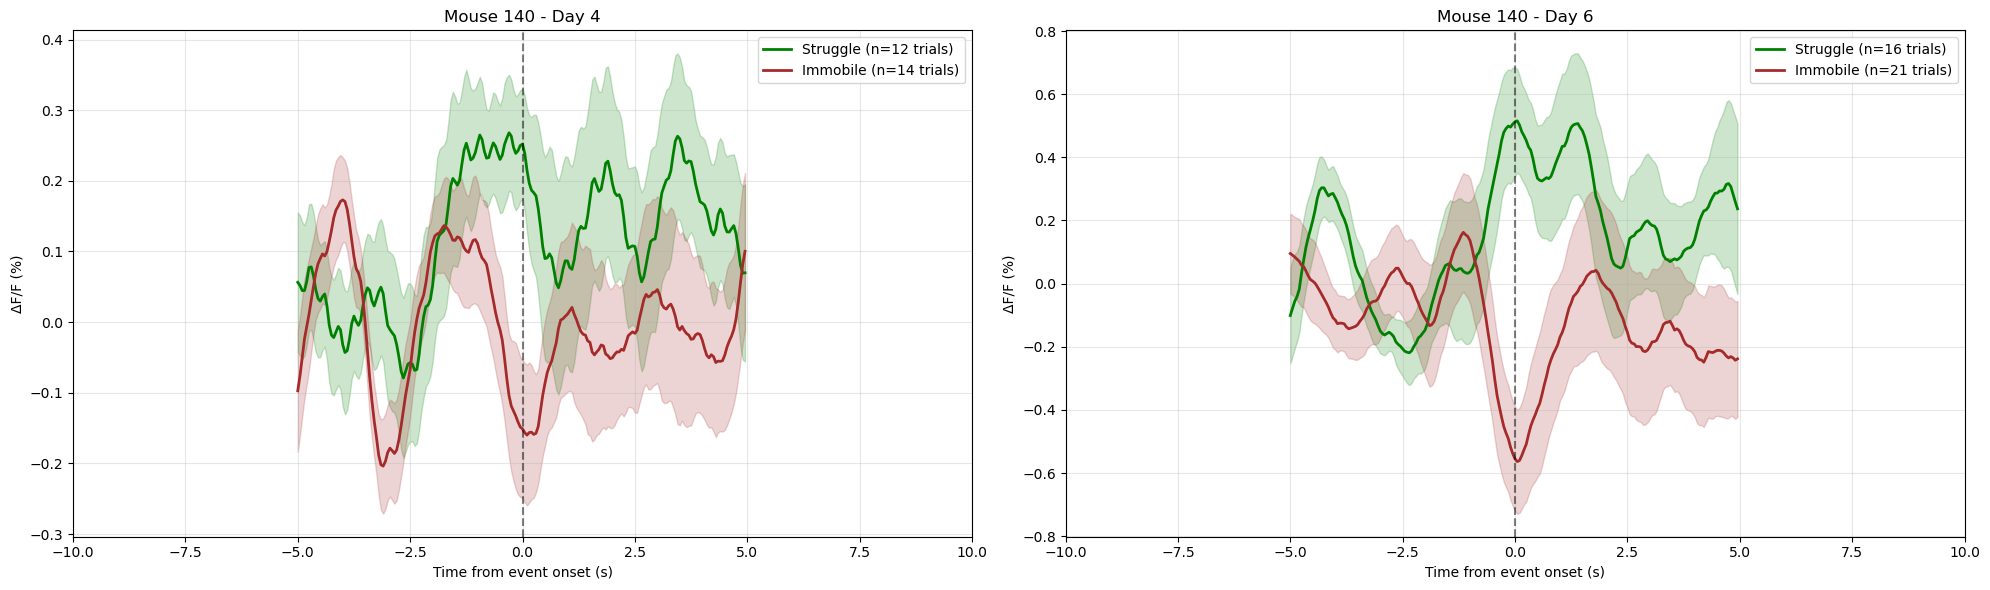

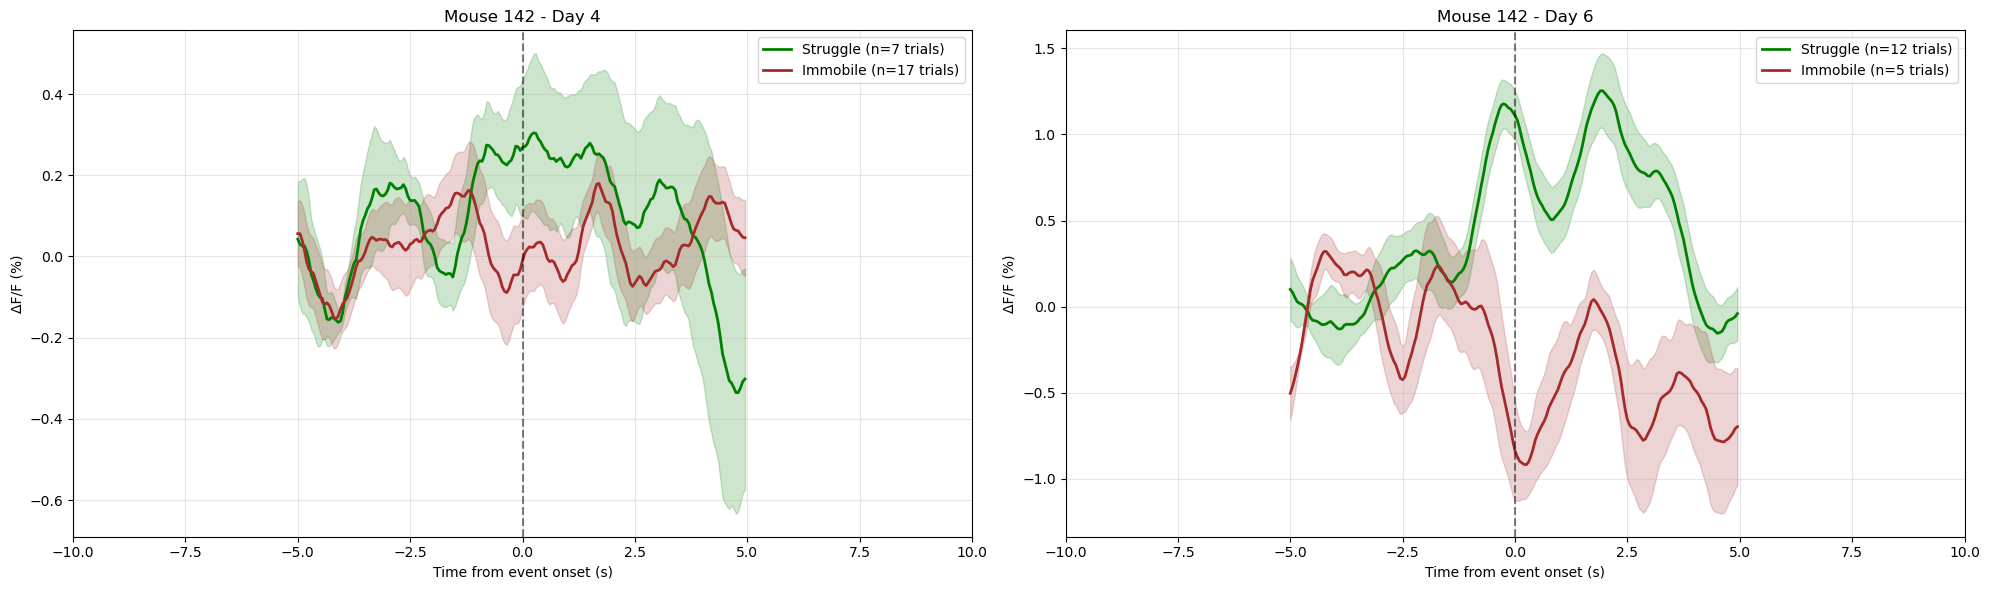

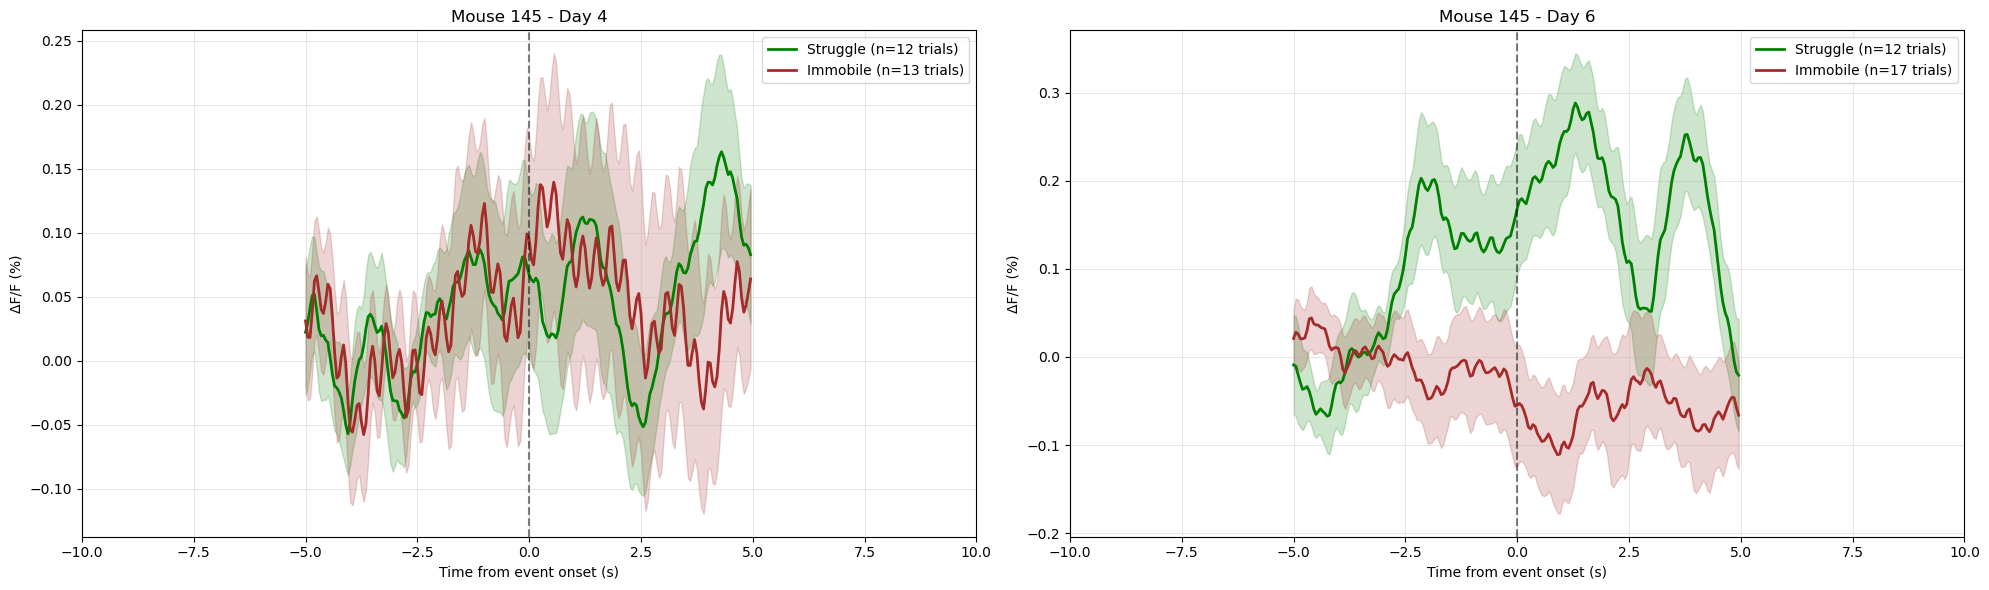

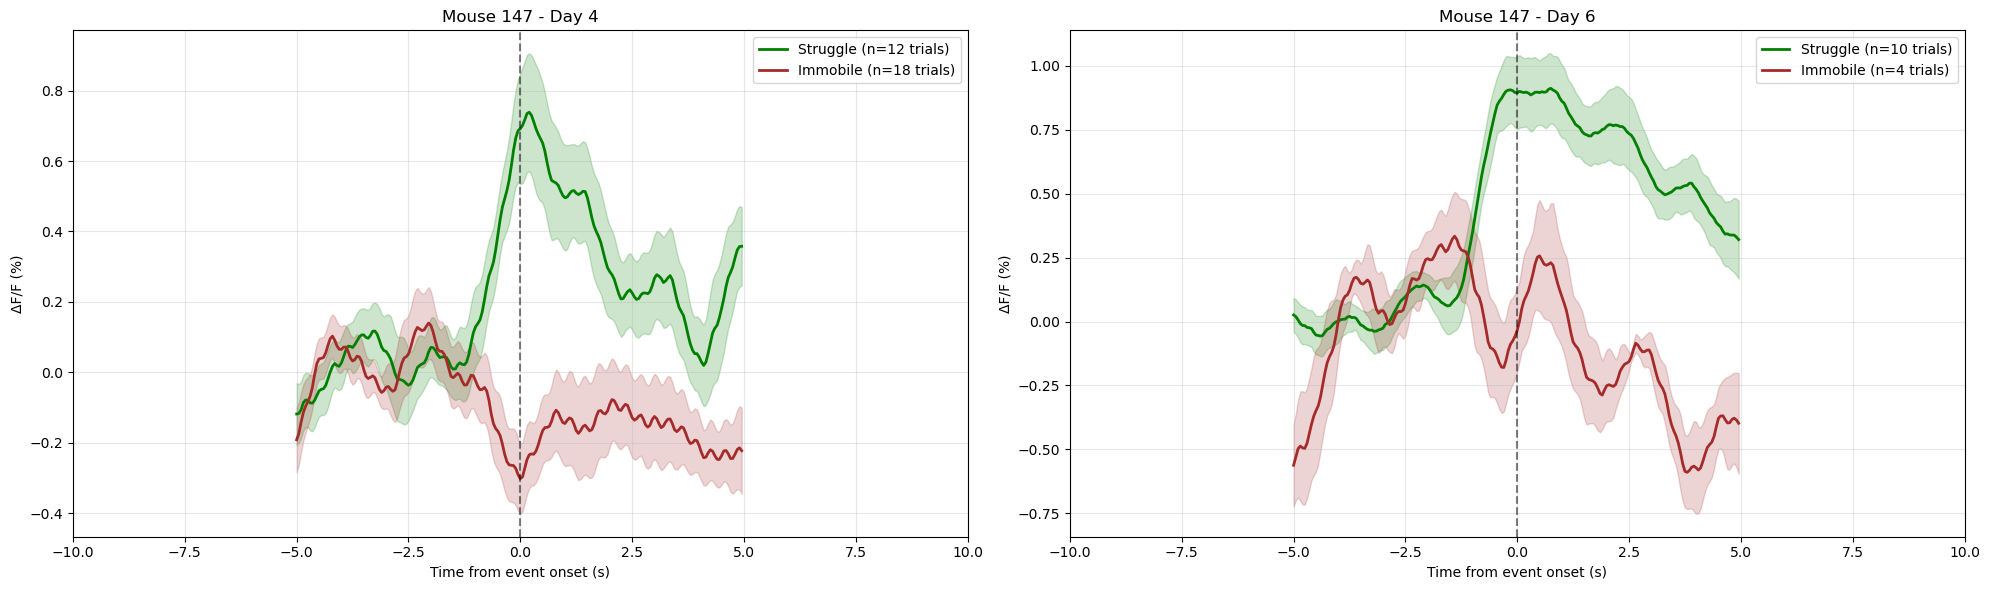

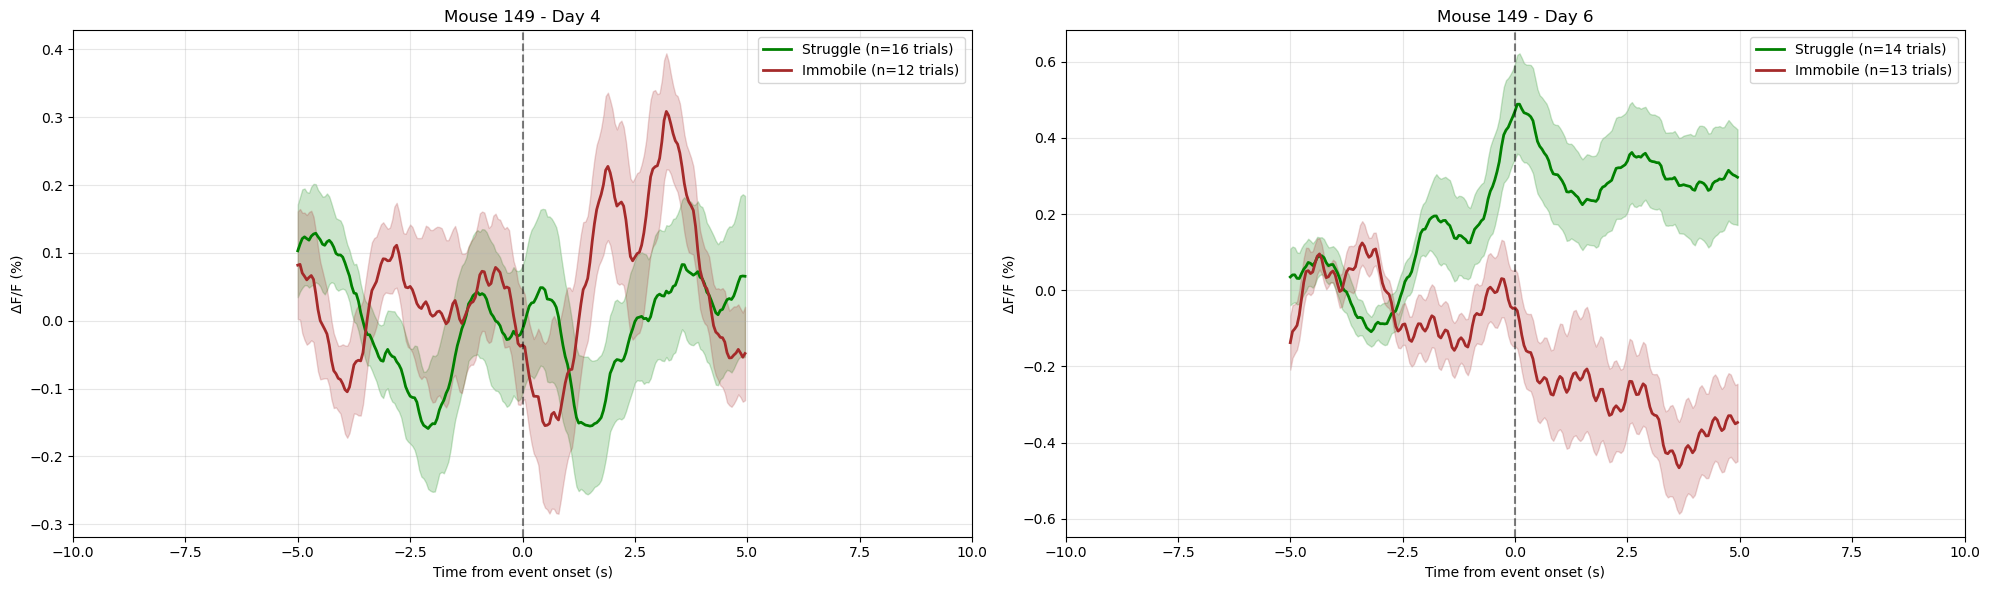

In [16]:
# Cell: Combined Visualization
def plot_combined_behaviors(mouse_id, struggle_data, immobile_data):
    """Plot struggle and immobility for one mouse"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot D4
    for data, label, color in [(struggle_data, 'Struggle', 'green'), 
                              (immobile_data, 'Immobile', 'brown')]:
        if 'D4' in data:
            mean = np.mean(data['D4']['trials'], axis=1)
            sem = np.std(data['D4']['trials'], axis=1) / np.sqrt(data['D4']['trials'].shape[1])
            time = data['D4']['time']
            
            ax1.plot(time, mean, color=color, linewidth=2, 
                    label=f'{label} (n={data["D4"]["trials"].shape[1]} trials)')
            ax1.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
    
    # Plot D6
    for data, label, color in [(struggle_data, 'Struggle', 'green'), 
                              (immobile_data, 'Immobile', 'brown')]:
        if 'D6' in data:
            mean = np.mean(data['D6']['trials'], axis=1)
            sem = np.std(data['D6']['trials'], axis=1) / np.sqrt(data['D6']['trials'].shape[1])
            time = data['D6']['time']
            
            ax2.plot(time, mean, color=color, linewidth=2, 
                    label=f'{label} (n={data["D6"]["trials"].shape[1]} trials)')
            ax2.fill_between(time, mean - sem, mean + sem, color=color, alpha=0.2)
    
    # Setup D4 plot
    ax1.set_xlim(-10, 10.0)
    ax1.set_title(f'Mouse {mouse_id} - Day 4')
    ax1.set_xlabel('Time from event onset (s)')
    ax1.set_ylabel('ΔF/F (%)')
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Setup D6 plot
    ax2.set_xlim(-10, 10.0)
    ax2.set_title(f'Mouse {mouse_id} - Day 6')
    ax2.set_xlabel('Time from event onset (s)')
    ax2.set_ylabel('ΔF/F (%)')
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for each mouse
for mouse in individual_results.keys():
    if mouse in immobile_results:
        plot_combined_behaviors(mouse, individual_results[mouse], immobile_results[mouse])

<h2> Immobility Statistics</h2>


Analyzing Immobility Data:
Analysis includes 5 mice: 140, 142, 145, 147, 149

1. Peak Response Analysis (-1 to 2s window):
Day 4: 0.127 ± 0.085
Day 6: 0.092 ± 0.094
Paired t-test: t=0.398, p=0.711
Wilcoxon signed-rank test: W=6.000, p=0.812
Cohen's d effect size: -0.386

2. Mean Response Analysis (0 to 2s window):
Day 4: -0.019 ± 0.082
Day 6: -0.164 ± 0.131
Paired t-test: t=1.642, p=0.176
Wilcoxon signed-rank test: W=2.000, p=0.188
Cohen's d effect size: -1.330

3. Area Under Curve Analysis (0 to 2s):
Day 4: -0.061 ± 0.246
Day 6: -0.498 ± 0.399
Paired t-test: t=1.630, p=0.178
Wilcoxon signed-rank test: W=2.000, p=0.188
Cohen's d effect size: -1.317



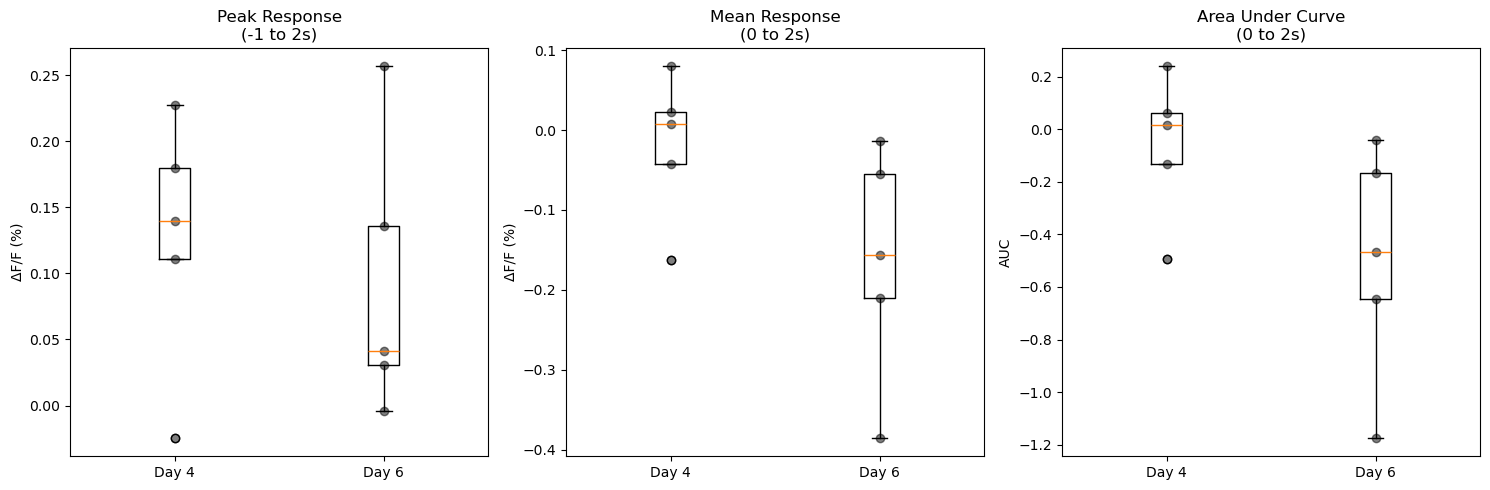

Linear Mixed Effects Analysis


Analysis for Peak Response:
--------------------------

Model Summary:
            Coef. Std.Err.       z  P>|z|  [0.025 0.975]
Intercept   0.127    0.047   2.728  0.006   0.036  0.218
Day[T.D6]  -0.035    0.063  -0.548  0.584  -0.159  0.089
Mouse Var   0.001                                       

Key Findings:
Effect of Day 6 vs Day 4: -0.035
P-value: 0.584
Cohen's d: -0.386


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

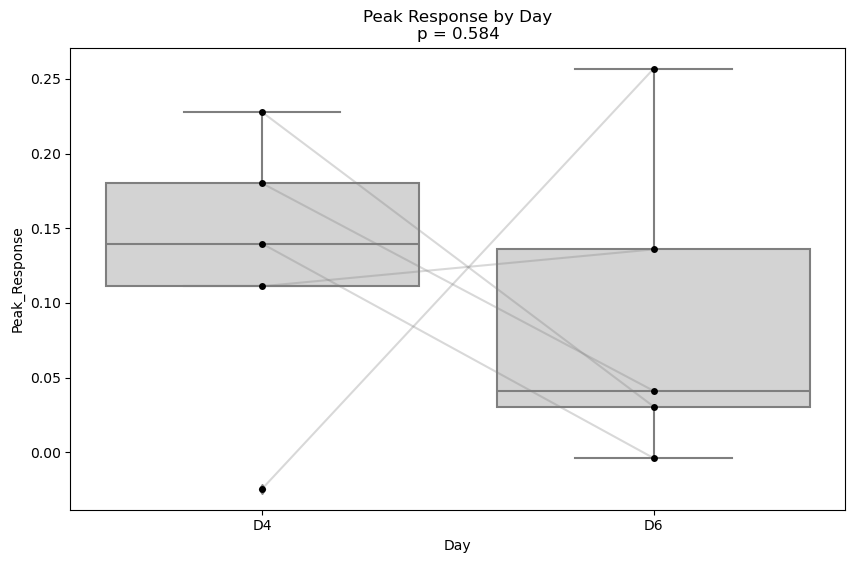


Analysis for Mean Response:
--------------------------

Model Summary:
            Coef. Std.Err.       z  P>|z|  [0.025 0.975]
Intercept  -0.019    0.063  -0.311  0.756  -0.142  0.103
Day[T.D6]  -0.169    0.089  -1.904  0.057  -0.342  0.005
Mouse Var   0.000    0.263                              

Key Findings:
Effect of Day 6 vs Day 4: -0.169
P-value: 0.057
Cohen's d: -1.347


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\seab

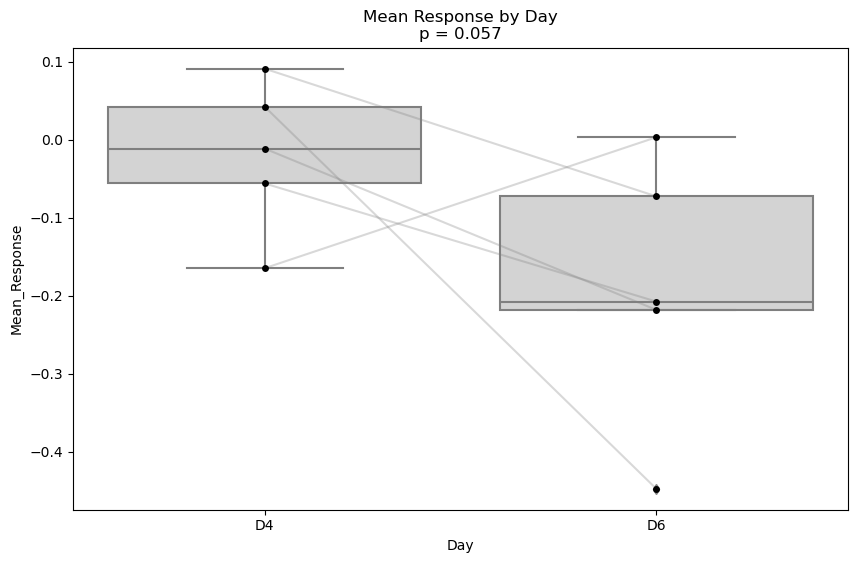


Analysis for AUC:
----------------

Model Summary:
            Coef. Std.Err.       z  P>|z|  [0.025 0.975]
Intercept  -0.039    0.126  -0.311  0.756  -0.285  0.207
Day[T.D6]  -0.336    0.178  -1.890  0.059  -0.684  0.012
Mouse Var   0.000    0.552                              

Key Findings:
Effect of Day 6 vs Day 4: -0.336
P-value: 0.059
Cohen's d: -1.336


C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

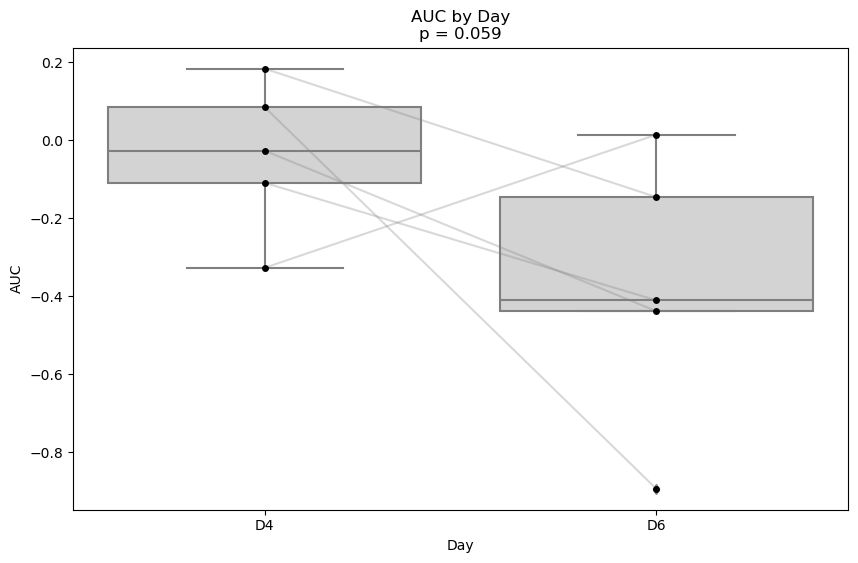

C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\veleanu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

In [17]:
# Cell: Immobility Statistics (same as struggle but for immobile data)
print("\nAnalyzing Immobility Data:")
analyze_statistics(immobile_results)
run_lme_analysis(immobile_results)

In [18]:
# Cell: Save Immobility Results
import os
import json
import pandas as pd
from scipy import stats
import numpy as np

def save_immobility_results(immobile_results, parent_dir):
    """
    Save all immobility results in appropriate subfolders within the immobility directory.
    """
    # Create necessary directories as subfolders of parent_dir
    for directory in ['Figures', 'Results', 'Data']:
        subfolder_path = os.path.join(parent_dir, directory)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
    
    # 1. Prepare to save statistics
    stats_data = {
        'mouse_id': [],
        'day4_peak': [],
        'day6_peak': [],
        'day4_mean': [],
        'day6_mean': [],
        'day4_auc': [],
        'day6_auc': []
    }
    
    detailed_stats = []
    
    for mouse, data in immobile_results.items():
        if 'D4' in data and 'D6' in data:
            # Calculate mean for each day
            d4_mean = np.mean(data['D4']['trials'], axis=1)
            d6_mean = np.mean(data['D6']['trials'], axis=1)
            time = data['D4']['time']
            
            # Define windows
            peak_window = (time >= 0) & (time <= 2)
            response_window = (time >= 0) & (time <= 2)
            
            # Calculate metrics
            stats_data['mouse_id'].append(mouse)
            stats_data['day4_peak'].append(np.min(d4_mean[peak_window]))
            stats_data['day6_peak'].append(np.min(d6_mean[peak_window]))
            stats_data['day4_mean'].append(np.mean(d4_mean[response_window]))
            stats_data['day6_mean'].append(np.mean(d6_mean[response_window]))
            stats_data['day4_auc'].append(np.trapz(d4_mean[response_window], time[response_window]))
            stats_data['day6_auc'].append(np.trapz(d6_mean[response_window], time[response_window]))
    
    # Convert to DataFrame for easy saving
    df_stats = pd.DataFrame(stats_data)
    
    # Calculate statistical tests
    for metric in ['peak', 'mean', 'auc']:
        d4_vals = df_stats[f'day4_{metric}']
        d6_vals = df_stats[f'day6_{metric}']
        
        # T-test
        t_stat, p_val = stats.ttest_rel(d4_vals, d6_vals)
        # Wilcoxon
        w_stat, w_p = stats.wilcoxon(d4_vals, d6_vals)
        # Effect size
        d = (np.mean(d6_vals) - np.mean(d4_vals)) / np.sqrt((np.std(d4_vals)**2 + np.std(d6_vals)**2) / 2)
        
        detailed_stats.append({
            'metric': metric,
            'day4_mean': np.mean(d4_vals),
            'day4_sd': np.std(d4_vals),
            'day6_mean': np.mean(d6_vals),
            'day6_sd': np.std(d6_vals),
            't_stat': t_stat,
            'p_value': p_val,
            'wilcoxon_stat': w_stat,
            'wilcoxon_p': w_p,
            'cohens_d': d
        })
    
    # Save results
    # 1. Excel file for GraphPad
    df_stats.to_excel(os.path.join(parent_dir, 'Data', 'immobility_mouse_metrics.xlsx'), index=False)
   
    # 2. CSV files for each metric (also for GraphPad)
    for metric in ['peak', 'mean', 'auc']:
        df_metric = pd.DataFrame({
            'Mouse_ID': df_stats['mouse_id'],
            'Day_4': df_stats[f'day4_{metric}'],
            'Day_6': df_stats[f'day6_{metric}']
        })
        df_metric.to_csv(os.path.join(parent_dir, 'Data', f'immobility_{metric}_response.csv'), index=False)
    
    # 3. Detailed statistics text file
    with open(os.path.join(parent_dir, 'Results', 'immobility_detailed_statistics.txt'), 'w') as f:
        f.write("Immobility PSTH Analysis Statistics\n")
        f.write("=================================\n\n")
        f.write(f"Analysis includes {len(stats_data['mouse_id'])} mice: {', '.join(stats_data['mouse_id'])}\n\n")
        
        for stat in detailed_stats:
            f.write(f"\n{stat['metric'].upper()} RESPONSE ANALYSIS:\n")
            f.write("-----------------------\n")
            f.write(f"Day 4: {stat['day4_mean']:.3f} ± {stat['day4_sd']:.3f}\n")
            f.write(f"Day 6: {stat['day6_mean']:.3f} ± {stat['day6_sd']:.3f}\n")
            f.write(f"Paired t-test: t={stat['t_stat']:.3f}, p={stat['p_value']:.3f}\n")
            f.write(f"Wilcoxon test: W={stat['wilcoxon_stat']:.3f}, p={stat['wilcoxon_p']:.3f}\n")
            f.write(f"Cohen's d: {stat['cohens_d']:.3f}\n")
    
    print(f"All immobility results saved in {parent_dir}:")
    print(f"1. Figures saved in SVG and PDF format in {os.path.join(parent_dir, 'Figures')}")
    print(f"2. Statistical results saved in {os.path.join(parent_dir, 'Results')}")
    print(f"3. Individual data saved in {os.path.join(parent_dir, 'Data')} (ready for GraphPad)")

# Run the saving function
save_immobility_results(immobile_results, str(immobile_dir))


All immobility results saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Immobility:
1. Figures saved in SVG and PDF format in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Immobility\Figures
2. Statistical results saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Immobility\Results
3. Individual data saved in C:\Users\veleanu\Downloads\Doktorarbeit\Fiber_batchseptember\FiberAnalysis\TST_Maximized_export_data\DFF\PSTH_retry_different_threshold\Inhibitory_Immobility\Data (ready for GraphPad)


<h2> Imobility comparison plots</h2>


Immobility Comparison Statistics:
Number of mice: 5

Day 4:
Peak response: 0.077 ± 0.024

Day 6:
Peak response: 0.078 ± 0.047


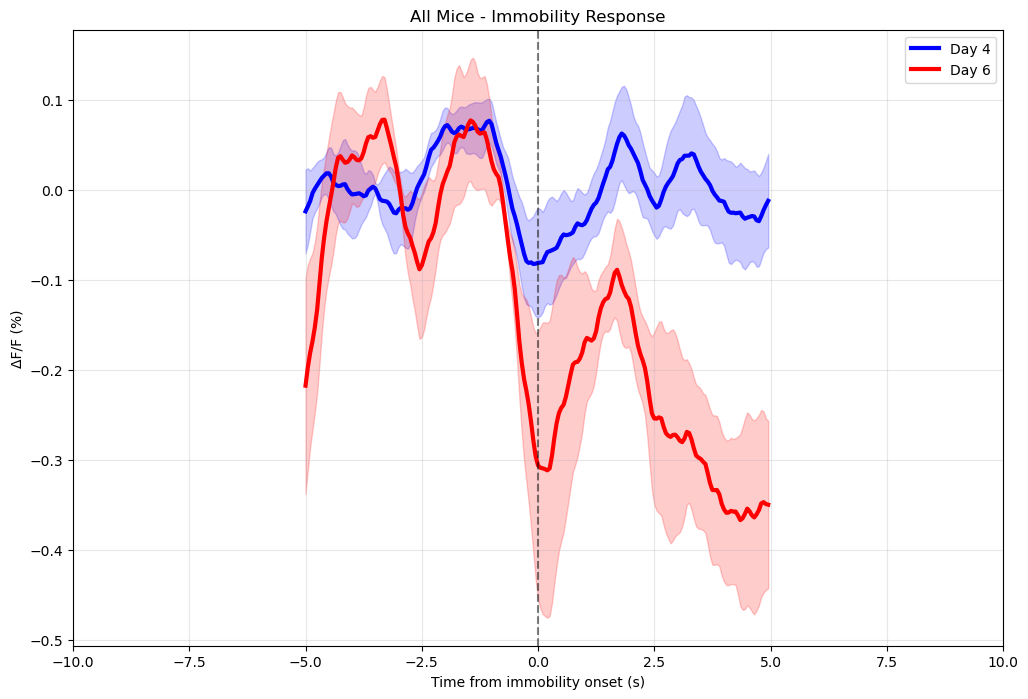

In [19]:
# Cell: Immobility Day Comparison Plots
plt.figure(figsize=(12, 8))

# Calculate average across all mice for each day
d4_means = []
d6_means = []
common_timepoints = None

for mouse, data in immobile_results.items():
    if 'D4' in data and 'D6' in data:
        d4_means.append(np.mean(data['D4']['trials'], axis=1))
        d6_means.append(np.mean(data['D6']['trials'], axis=1))
        common_timepoints = data['D4']['time']

if d4_means and d6_means:
    d4_means = np.array(d4_means)
    d6_means = np.array(d6_means)
    
    # Calculate grand mean and SEM across mice
    d4_grand_mean = np.mean(d4_means, axis=0)
    d4_grand_sem = np.std(d4_means, axis=0) / np.sqrt(len(d4_means))
    
    d6_grand_mean = np.mean(d6_means, axis=0)
    d6_grand_sem = np.std(d6_means, axis=0) / np.sqrt(len(d6_means))
    
    plt.plot(common_timepoints, d4_grand_mean, 'b-', label='Day 4', linewidth=3)
    plt.fill_between(common_timepoints, 
                    d4_grand_mean - d4_grand_sem,
                    d4_grand_mean + d4_grand_sem,
                    color='blue', alpha=0.2)
    
    plt.plot(common_timepoints, d6_grand_mean, 'r-', label='Day 6', linewidth=3)
    plt.fill_between(common_timepoints,
                    d6_grand_mean - d6_grand_sem,
                    d6_grand_mean + d6_grand_sem,
                    color='red', alpha=0.2)

plt.xlim(-10, 10)  # or (-0.75, 1.0) for zoomed view
plt.title('All Mice - Immobility Response')
plt.xlabel('Time from immobility onset (s)')
plt.ylabel('ΔF/F (%)')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()

# Print statistics
print("\nImmobility Comparison Statistics:")
print(f"Number of mice: {len(d4_means)}")
print("\nDay 4:")
print(f"Peak response: {np.max(d4_grand_mean):.3f} ± {d4_grand_sem[np.argmax(d4_grand_mean)]:.3f}")
print("\nDay 6:")
print(f"Peak response: {np.max(d6_grand_mean):.3f} ± {d6_grand_sem[np.argmax(d6_grand_mean)]:.3f}")

plt.show()

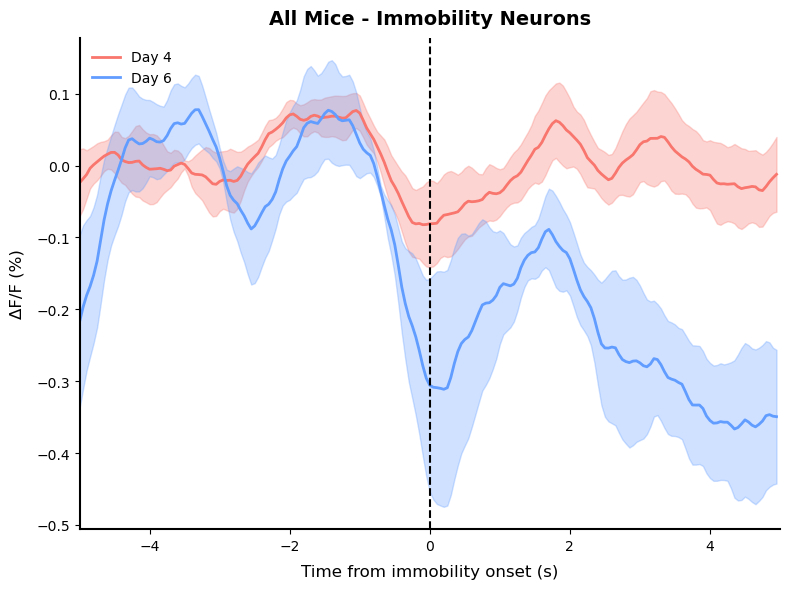

In [20]:
plt.figure(figsize=(8, 6))

# Calculate means for both days
d4_means = []
d6_means = []
common_timepoints = None

for mouse, data in immobile_results.items():
    if 'D4' in data and 'D6' in data:
        d4_means.append(np.mean(data['D4']['trials'], axis=1))
        d6_means.append(np.mean(data['D6']['trials'], axis=1))
        common_timepoints = data['D4']['time']

if d4_means and d6_means:
    d4_means = np.array(d4_means)
    d6_means = np.array(d6_means)
    
    d4_grand_mean = np.mean(d4_means, axis=0)
    d4_grand_sem = np.std(d4_means, axis=0) / np.sqrt(len(d4_means))
    d6_grand_mean = np.mean(d6_means, axis=0)
    d6_grand_sem = np.std(d6_means, axis=0) / np.sqrt(len(d6_means))
    
    plt.plot(common_timepoints, d4_grand_mean, color='#F8766D', label='Day 4', linewidth=2)
    plt.fill_between(common_timepoints, 
                     d4_grand_mean - d4_grand_sem,
                     d4_grand_mean + d4_grand_sem,
                     color='#F8766D', alpha=0.3)
    
    plt.plot(common_timepoints, d6_grand_mean, color='#619CFF', label='Day 6', linewidth=2)
    plt.fill_between(common_timepoints,
                     d6_grand_mean - d6_grand_sem,
                     d6_grand_mean + d6_grand_sem,
                     color='#619CFF', alpha=0.3)

plt.xlim(-5, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.title(f'All Mice - Immobility Neurons', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Time from immobility onset (s)', fontsize=12, labelpad=8)
plt.ylabel('ΔF/F (%)', fontsize=12, labelpad=8)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(False)
plt.legend(fontsize=10, frameon=False, loc='upper left')

# Create Figures directory in immobile_dir if it doesn't exist
figures_dir = os.path.join(immobile_dir, 'Figures')
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Save to immobile_dir instead of data_dir
plt.savefig(os.path.join(figures_dir, 'Immobility_PSTH.svg'), format='svg', bbox_inches='tight')
plt.savefig(os.path.join(figures_dir, 'Immobility_PSTH.pdf'), format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

<h2>Signal Noise Ratio Analysis</h2>

SNR Analysis Results

Struggle Behavior:
-----------------

Mouse 140:
  Day 4 - Classical SNR: 0.449
  Day 6 - Classical SNR: 0.357
  Reliability change: 0.087

Mouse 142:
  Day 4 - Classical SNR: 0.523
  Day 6 - Classical SNR: 1.140
  Reliability change: 0.225

Mouse 145:
  Day 4 - Classical SNR: 0.247
  Day 6 - Classical SNR: 0.800
  Reliability change: 0.019

Mouse 147:
  Day 4 - Classical SNR: 0.846
  Day 6 - Classical SNR: 1.649
  Reliability change: 0.271

Mouse 149:
  Day 4 - Classical SNR: 0.158
  Day 6 - Classical SNR: 0.623
  Reliability change: 0.057

Group Statistics:
SNR D4 vs D6: t=-3.110, p=0.036


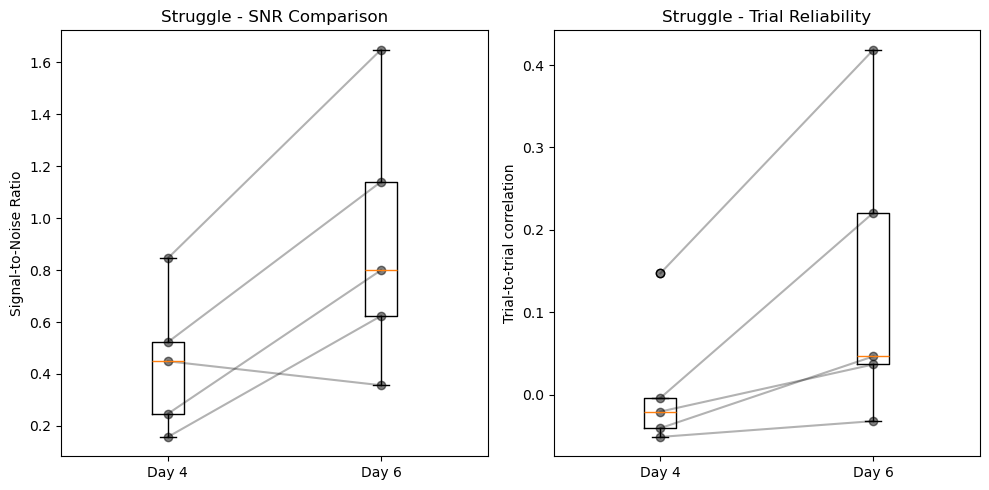


Immobile Behavior:
-----------------

Mouse 140:
  Day 4 - Classical SNR: 0.223
  Day 6 - Classical SNR: 0.214
  Reliability change: 0.018

Mouse 142:
  Day 4 - Classical SNR: 0.181
  Day 6 - Classical SNR: 0.512
  Reliability change: 0.027

Mouse 145:
  Day 4 - Classical SNR: 0.244
  Day 6 - Classical SNR: 0.193
  Reliability change: 0.012

Mouse 147:
  Day 4 - Classical SNR: 0.294
  Day 6 - Classical SNR: 0.495
  Reliability change: 0.205

Mouse 149:
  Day 4 - Classical SNR: 0.210
  Day 6 - Classical SNR: 0.388
  Reliability change: -0.011

Group Statistics:
SNR D4 vs D6: t=-1.841, p=0.139


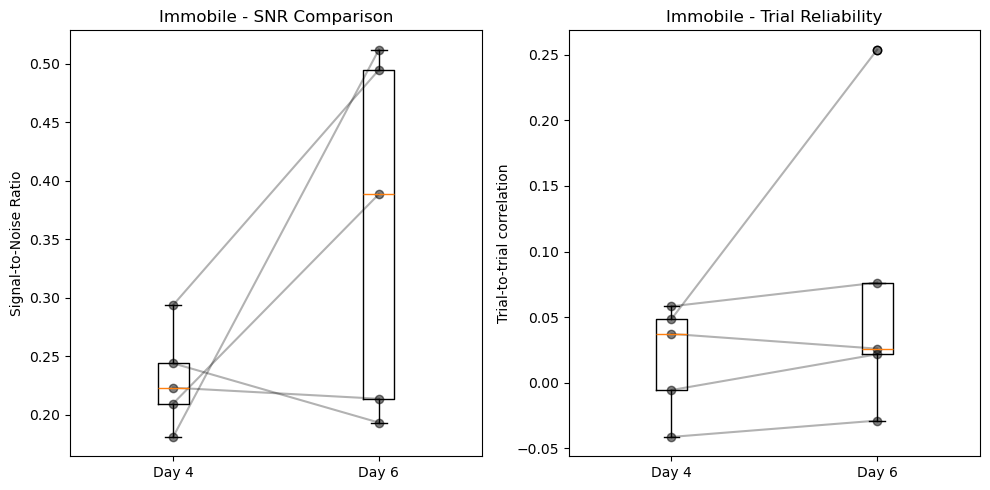

In [21]:
# Cell: Signal-to-Noise Analysis
def calculate_snr_metrics(data, window=(-2, 2)):
    """
    Calculate SNR metrics from the data
    window: time window around event (default -2 to 2 seconds)
    """
    time = data['time']
    trials = data['trials']
    
    # Get time window indices
    window_idx = np.where((time >= window[0]) & (time <= window[1]))[0]
    
    # Get event window data
    event_data = trials[window_idx, :]
    
    # 1. Classical SNR (mean signal / std noise)
    mean_signal = np.mean(event_data, axis=1)  # mean across time
    trial_variability = np.std(event_data, axis=1)  # std across time
    snr_classical = np.mean(np.abs(mean_signal)) / np.mean(trial_variability)
    
    # 2. Peak SNR
    peak_signal = np.max(np.abs(mean_signal))
    peak_snr = peak_signal / np.mean(trial_variability)
    
    # 3. Response reliability (trial-to-trial correlation)
    trial_correlations = []
    n_trials = trials.shape[1]
    for i in range(n_trials):
        for j in range(i+1, n_trials):
            corr = np.corrcoef(trials[window_idx, i], trials[window_idx, j])[0,1]
            if not np.isnan(corr):  # ignore nan correlations
                trial_correlations.append(corr)
    reliability = np.mean(trial_correlations) if trial_correlations else 0
    
    return {
        'snr_classical': snr_classical,
        'peak_snr': peak_snr,
        'reliability': reliability
    }

# Compare D4 vs D6 for both behaviors
print("SNR Analysis Results")
print("===================")

for behavior, data in [("Struggle", individual_results), ("Immobile", immobile_results)]:
    print(f"\n{behavior} Behavior:")
    print("-" * (len(behavior) + 9))
    
    d4_metrics = []
    d6_metrics = []
    
    for mouse in data.keys():
        if 'D4' in data[mouse] and 'D6' in data[mouse]:
            d4_result = calculate_snr_metrics(data[mouse]['D4'])
            d6_result = calculate_snr_metrics(data[mouse]['D6'])
            
            d4_metrics.append(d4_result)
            d6_metrics.append(d6_result)
            
            print(f"\nMouse {mouse}:")
            print(f"  Day 4 - Classical SNR: {d4_result['snr_classical']:.3f}")
            print(f"  Day 6 - Classical SNR: {d6_result['snr_classical']:.3f}")
            print(f"  Reliability change: {d6_result['reliability'] - d4_result['reliability']:.3f}")
    
    # Statistical comparison
    if d4_metrics:  # only if we have data
        d4_snr = [x['snr_classical'] for x in d4_metrics]
        d6_snr = [x['snr_classical'] for x in d6_metrics]
        
        t_stat, p_val = stats.ttest_rel(d4_snr, d6_snr)
        print(f"\nGroup Statistics:")
        print(f"SNR D4 vs D6: t={t_stat:.3f}, p={p_val:.3f}")

        # Visualization
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.boxplot([d4_snr, d6_snr], labels=['Day 4', 'Day 6'])
        plt.title(f'{behavior} - SNR Comparison')
        plt.ylabel('Signal-to-Noise Ratio')
        
        # Add individual points and connecting lines
        for i in range(len(d4_snr)):
            plt.plot([1, 2], [d4_snr[i], d6_snr[i]], 'k-', alpha=0.3)
            plt.plot([1], [d4_snr[i]], 'ko', alpha=0.5)
            plt.plot([2], [d6_snr[i]], 'ko', alpha=0.5)
            
        plt.subplot(122)
        reliabilities_d4 = [x['reliability'] for x in d4_metrics]
        reliabilities_d6 = [x['reliability'] for x in d6_metrics]
        plt.boxplot([reliabilities_d4, reliabilities_d6], labels=['Day 4', 'Day 6'])
        plt.title(f'{behavior} - Trial Reliability')
        plt.ylabel('Trial-to-trial correlation')
        
        # Add individual points and connecting lines
        for i in range(len(reliabilities_d4)):
            plt.plot([1, 2], [reliabilities_d4[i], reliabilities_d6[i]], 'k-', alpha=0.3)
            plt.plot([1], [reliabilities_d4[i]], 'ko', alpha=0.5)
            plt.plot([2], [reliabilities_d6[i]], 'ko', alpha=0.5)
            
        plt.tight_layout()
        plt.show()

Behavior Discrimination Analysis

Mouse 140:
  D4 vs D6 Peak difference: 0.428 → 1.079
  D4 vs D6 Cohen's d: 3.159 → 3.206

Mouse 142:
  D4 vs D6 Peak difference: 0.394 → 2.173
  D4 vs D6 Cohen's d: 4.177 → 4.259

Mouse 145:
  D4 vs D6 Peak difference: 0.097 → 0.399
  D4 vs D6 Cohen's d: 0.591 → 5.625

Mouse 147:
  D4 vs D6 Peak difference: 1.041 → 1.199
  D4 vs D6 Cohen's d: 5.245 → 5.479

Mouse 149:
  D4 vs D6 Peak difference: 0.203 → 0.779
  D4 vs D6 Cohen's d: 0.486 → 4.616

Group Statistics:
Discrimination change D4 vs D6: t=-2.425, p=0.072


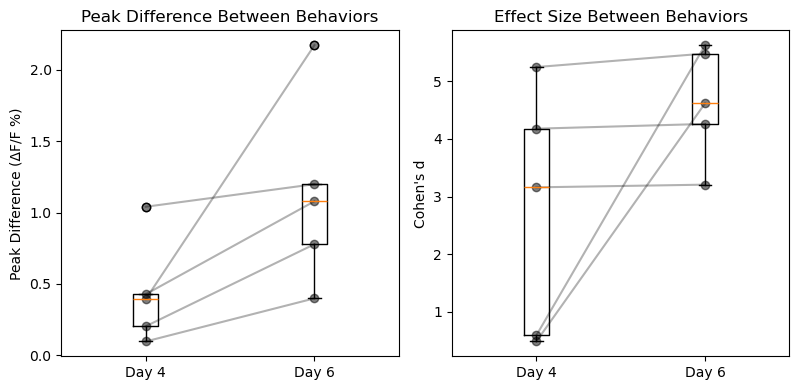

In [22]:
# Cell: Discrimination Index Analysis
def calculate_discrimination_index(struggle_data, immobile_data, window=(-1, 2)):
    """Calculate discrimination between behaviors"""
    time = struggle_data['time']
    window_idx = np.where((time >= window[0]) & (time <= window[1]))[0]
    
    # Calculate mean responses
    struggle_mean = np.mean(struggle_data['trials'][window_idx, :], axis=1)
    immobile_mean = np.mean(immobile_data['trials'][window_idx, :], axis=1)
    
    peak_diff = np.max(struggle_mean) - np.min(immobile_mean)
    area_diff = np.trapz(np.abs(struggle_mean - immobile_mean))
    
    # Cohen's d
    pooled_std = np.sqrt((np.var(struggle_mean) + np.var(immobile_mean)) / 2)
    cohens_d = np.abs(np.mean(struggle_mean) - np.mean(immobile_mean)) / pooled_std
    
    return {
        'peak_difference': peak_diff,
        'area_difference': area_diff,
        'cohens_d': cohens_d
    }

print("Behavior Discrimination Analysis")
print("==============================")

discrimination_results = {}

for mouse in individual_results:
    if (mouse in immobile_results and 
        'D4' in individual_results[mouse] and 'D4' in immobile_results[mouse] and
        'D6' in individual_results[mouse] and 'D6' in immobile_results[mouse]):
        
        # Calculate D4
        d4_disc = calculate_discrimination_index(
            individual_results[mouse]['D4'],
            immobile_results[mouse]['D4']
        )
        
        # Calculate D6
        d6_disc = calculate_discrimination_index(
            individual_results[mouse]['D6'],
            immobile_results[mouse]['D6']
        )
        
        discrimination_results[mouse] = {
            'D4': d4_disc,
            'D6': d6_disc
        }
        
        print(f"\nMouse {mouse}:")
        print(f"  D4 vs D6 Peak difference: {d4_disc['peak_difference']:.3f} → {d6_disc['peak_difference']:.3f}")
        print(f"  D4 vs D6 Cohen's d: {d4_disc['cohens_d']:.3f} → {d6_disc['cohens_d']:.3f}")

# Statistics
if discrimination_results:
    d4_peaks = [data['D4']['peak_difference'] for data in discrimination_results.values()]
    d6_peaks = [data['D6']['peak_difference'] for data in discrimination_results.values()]
    t_stat, p_val = stats.ttest_rel(d4_peaks, d6_peaks)
    
    print("\nGroup Statistics:")
    print(f"Discrimination change D4 vs D6: t={t_stat:.3f}, p={p_val:.3f}")
    
    # Visualization
    plt.figure(figsize=(12, 4))
    
    # Peak difference
    plt.subplot(131)
    plt.boxplot([d4_peaks, d6_peaks], labels=['Day 4', 'Day 6'])
    plt.title('Peak Difference Between Behaviors')
    plt.ylabel('Peak Difference (ΔF/F %)')
    for i in range(len(d4_peaks)):
        plt.plot([1, 2], [d4_peaks[i], d6_peaks[i]], 'k-', alpha=0.3)
        plt.plot([1], [d4_peaks[i]], 'ko', alpha=0.5)
        plt.plot([2], [d6_peaks[i]], 'ko', alpha=0.5)
    
    # Cohen's d
    plt.subplot(132)
    d4_cohen = [data['D4']['cohens_d'] for data in discrimination_results.values()]
    d6_cohen = [data['D6']['cohens_d'] for data in discrimination_results.values()]
    plt.boxplot([d4_cohen, d6_cohen], labels=['Day 4', 'Day 6'])
    plt.title("Effect Size Between Behaviors")
    plt.ylabel("Cohen's d")
    for i in range(len(d4_cohen)):
        plt.plot([1, 2], [d4_cohen[i], d6_cohen[i]], 'k-', alpha=0.3)
        plt.plot([1], [d4_cohen[i]], 'ko', alpha=0.5)
        plt.plot([2], [d6_cohen[i]], 'ko', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

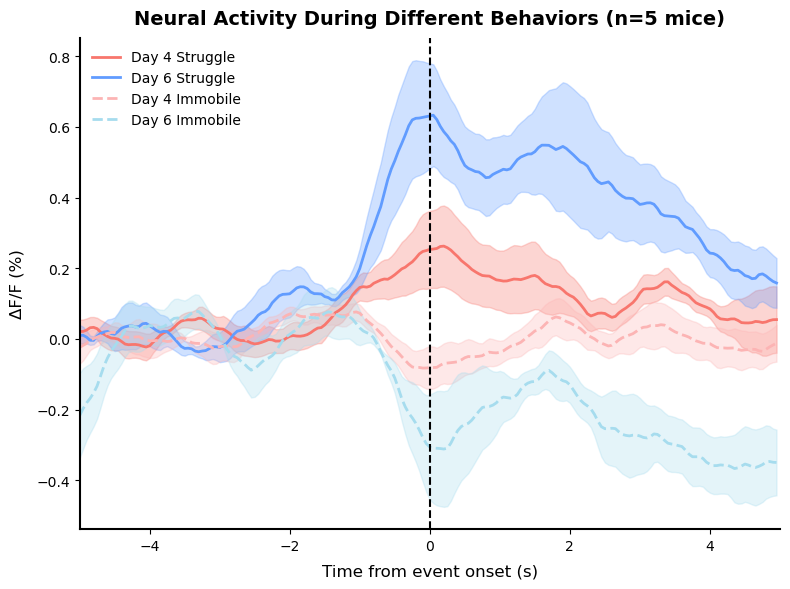

In [23]:
def plot_combined_conditions(individual_results, immobile_results):
    """Plot all conditions on one graph with group means."""
    
    # Create Figures directory if it doesn't exist
    figures_dir = os.path.join(immobile_dir, 'Figures')
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)
    
    # Calculate means for each condition
    times = None
    struggle_d4 = []
    struggle_d6 = []
    immobile_d4 = []
    immobile_d6 = []

    # Get common mice with all conditions
    common_mice = [m for m in individual_results if m in immobile_results and 
                   'D4' in individual_results[m] and 'D6' in individual_results[m] and
                   'D4' in immobile_results[m] and 'D6' in immobile_results[m]]

    for mouse in common_mice:
        times = individual_results[mouse]['D4']['time']
        struggle_d4.append(np.mean(individual_results[mouse]['D4']['trials'], axis=1))
        struggle_d6.append(np.mean(individual_results[mouse]['D6']['trials'], axis=1))
        immobile_d4.append(np.mean(immobile_results[mouse]['D4']['trials'], axis=1))
        immobile_d6.append(np.mean(immobile_results[mouse]['D6']['trials'], axis=1))

    # Convert to arrays and calculate means/SEMs
    struggle_d4_mean = np.mean(struggle_d4, axis=0)
    struggle_d6_mean = np.mean(struggle_d6, axis=0)
    immobile_d4_mean = np.mean(immobile_d4, axis=0)
    immobile_d6_mean = np.mean(immobile_d6, axis=0)

    struggle_d4_sem = np.std(struggle_d4, axis=0) / np.sqrt(len(struggle_d4))
    struggle_d6_sem = np.std(struggle_d6, axis=0) / np.sqrt(len(struggle_d6))
    immobile_d4_sem = np.std(immobile_d4, axis=0) / np.sqrt(len(immobile_d4))
    immobile_d6_sem = np.std(immobile_d6, axis=0) / np.sqrt(len(immobile_d6))

    # Plot
    plt.figure(figsize=(8, 6))

    # Plot Struggle
    plt.plot(times, struggle_d4_mean, color='#F8766D', linestyle='-', linewidth=2, label='Day 4 Struggle')
    plt.fill_between(times, struggle_d4_mean - struggle_d4_sem, struggle_d4_mean + struggle_d4_sem, 
                     color='#F8766D', alpha=0.3)

    plt.plot(times, struggle_d6_mean, color='#619CFF', linestyle='-', linewidth=2, label='Day 6 Struggle')
    plt.fill_between(times, struggle_d6_mean - struggle_d6_sem, struggle_d6_mean + struggle_d6_sem, 
                     color='#619CFF', alpha=0.3)

    # Plot Immobile
    plt.plot(times, immobile_d4_mean, color='#FCB4B4', linestyle='--', linewidth=2, label='Day 4 Immobile')
    plt.fill_between(times, immobile_d4_mean - immobile_d4_sem, immobile_d4_mean + immobile_d4_sem, 
                     color='#FCB4B4', alpha=0.3)

    plt.plot(times, immobile_d6_mean, color='#A6DCEE', linestyle='--', linewidth=2, label='Day 6 Immobile')
    plt.fill_between(times, immobile_d6_mean - immobile_d6_sem, immobile_d6_mean + immobile_d6_sem, 
                     color='#A6DCEE', alpha=0.3)

    # Customize axes and layout
    plt.xlim(-5, 5)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
    plt.xlabel('Time from event onset (s)', fontsize=12, labelpad=8)
    plt.ylabel('ΔF/F (%)', fontsize=12, labelpad=8)
    plt.title(f'Neural Activity During Different Behaviors (n={len(common_mice)} mice)', fontsize=14, fontweight='bold', pad=10)

    # Aesthetic adjustments
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.grid(False)

    # Legend adjustments
    plt.legend(fontsize=10, frameon=False, loc='upper left')

    # Save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, 'combined_conditions.svg'), format='svg', dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(figures_dir, 'combined_conditions.pdf'), format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Call the function
plot_combined_conditions(individual_results, immobile_results)


In [138]:
clear all